In [210]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.animation import FuncAnimation

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from functions.read_g4bl_data import readDetData
from functions.set_plot_settings import setPlotSettings

setPlotSettings(font=True)

# Location of G4bl output:
dir = 'g4bl-output/'

# Figure directory:
fig_dir = 'figures/'

# Define RF period:
f = 325*10**6 # MHz
T = 1/f*10**9 # ns

# Number of detectors:
ndet = 31

In [211]:
# Choose to cut on p_total:
cuts = True

# Define cuts (MeV/c):
low_p_cut = 150
high_p_cut = 350

In [212]:
# Load data:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
t_vals = []
xp_vals = []; yp_vals = []
pdgids = []
for i in range(ndet):
    data = readDetData(dir+'out'+str(i+1)+'.txt', cuts=cuts, low_p_cut=low_p_cut, high_p_cut=high_p_cut)

    # Drop everything that is not mu+:
    data = data[data.PDGid == -13]

    x_vals.append(data['x'].values); y_vals.append(data['y'].values); z_vals.append(data['z'].values) # mm
    px_vals.append(data['px'].values); py_vals.append(data['py'].values); pz_vals.append(data['pz'].values) # MeV/c
    ptotal_vals.append(data['ptotal'].values) # Mev/c
    t_vals.append(data['t'].values) # ns
    xp_vals.append(data['xp'].values); yp_vals.append(data['yp'].values) # radians
    pdgids.append(data['PDGid'].values)

    del data

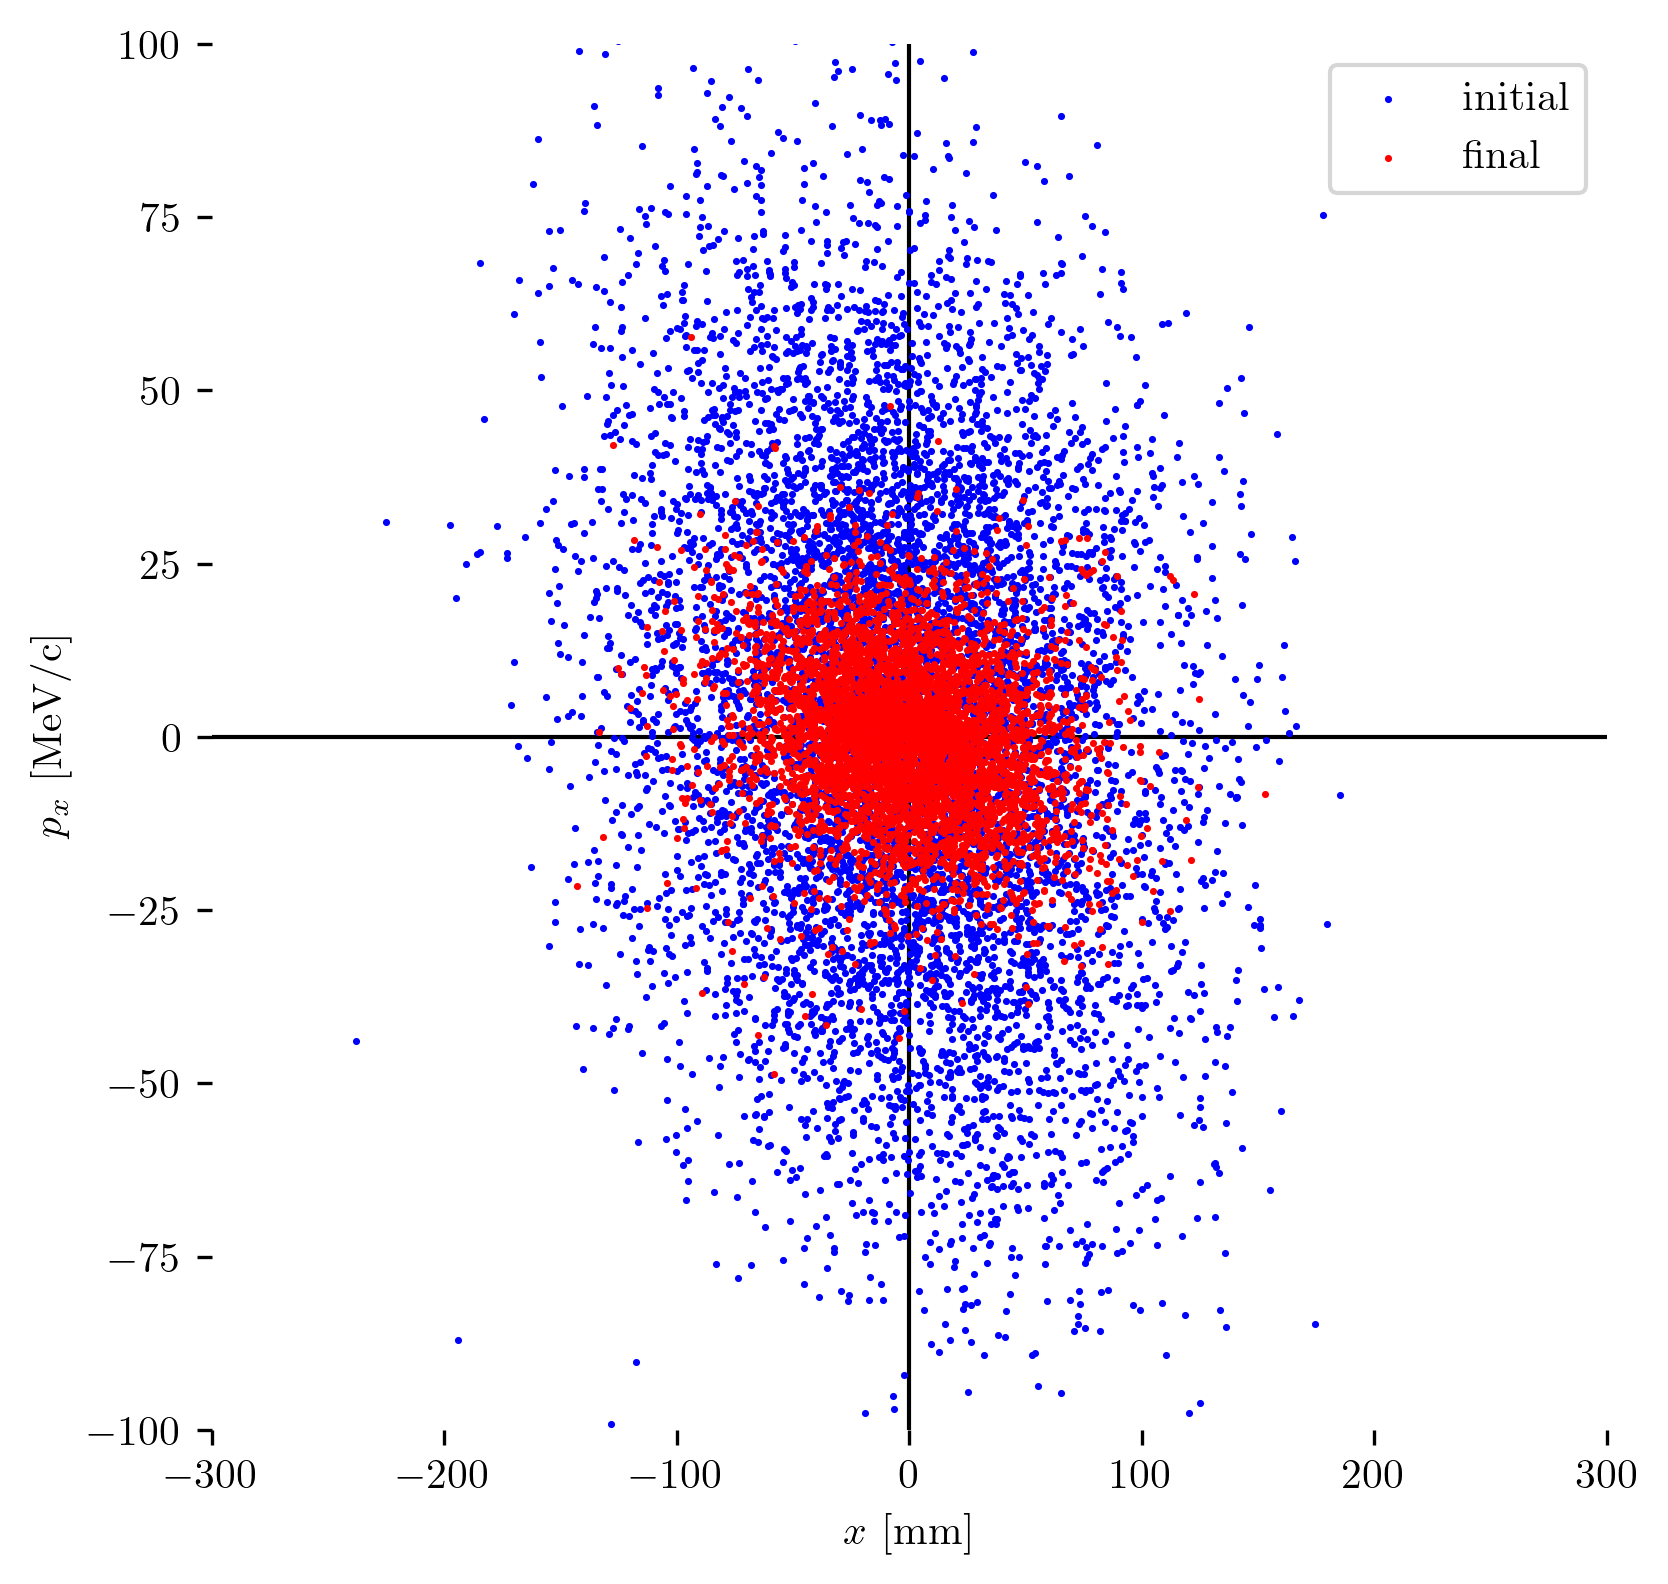

In [213]:
# Plot p_x vs. x:
fig, ax = plt.subplots(figsize=(6,6))
for spine in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[spine].set_visible(False)
plt.axhline(0, color='black', linewidth=1, zorder=-10)
plt.axvline(0, color='black', linewidth=1, zorder=-10)
plt.scatter(x_vals[0],px_vals[0],color='blue',label='initial',s=0.5)
plt.scatter(x_vals[ndet-1],px_vals[ndet-1],color='red',label='final',s=0.5)
plt.xlim(-300,300)
plt.ylim(-100,100)
plt.xlabel('$x$ [mm]')
plt.ylabel('$p_x$ [MeV/c]')
plt.legend()
plt.show()

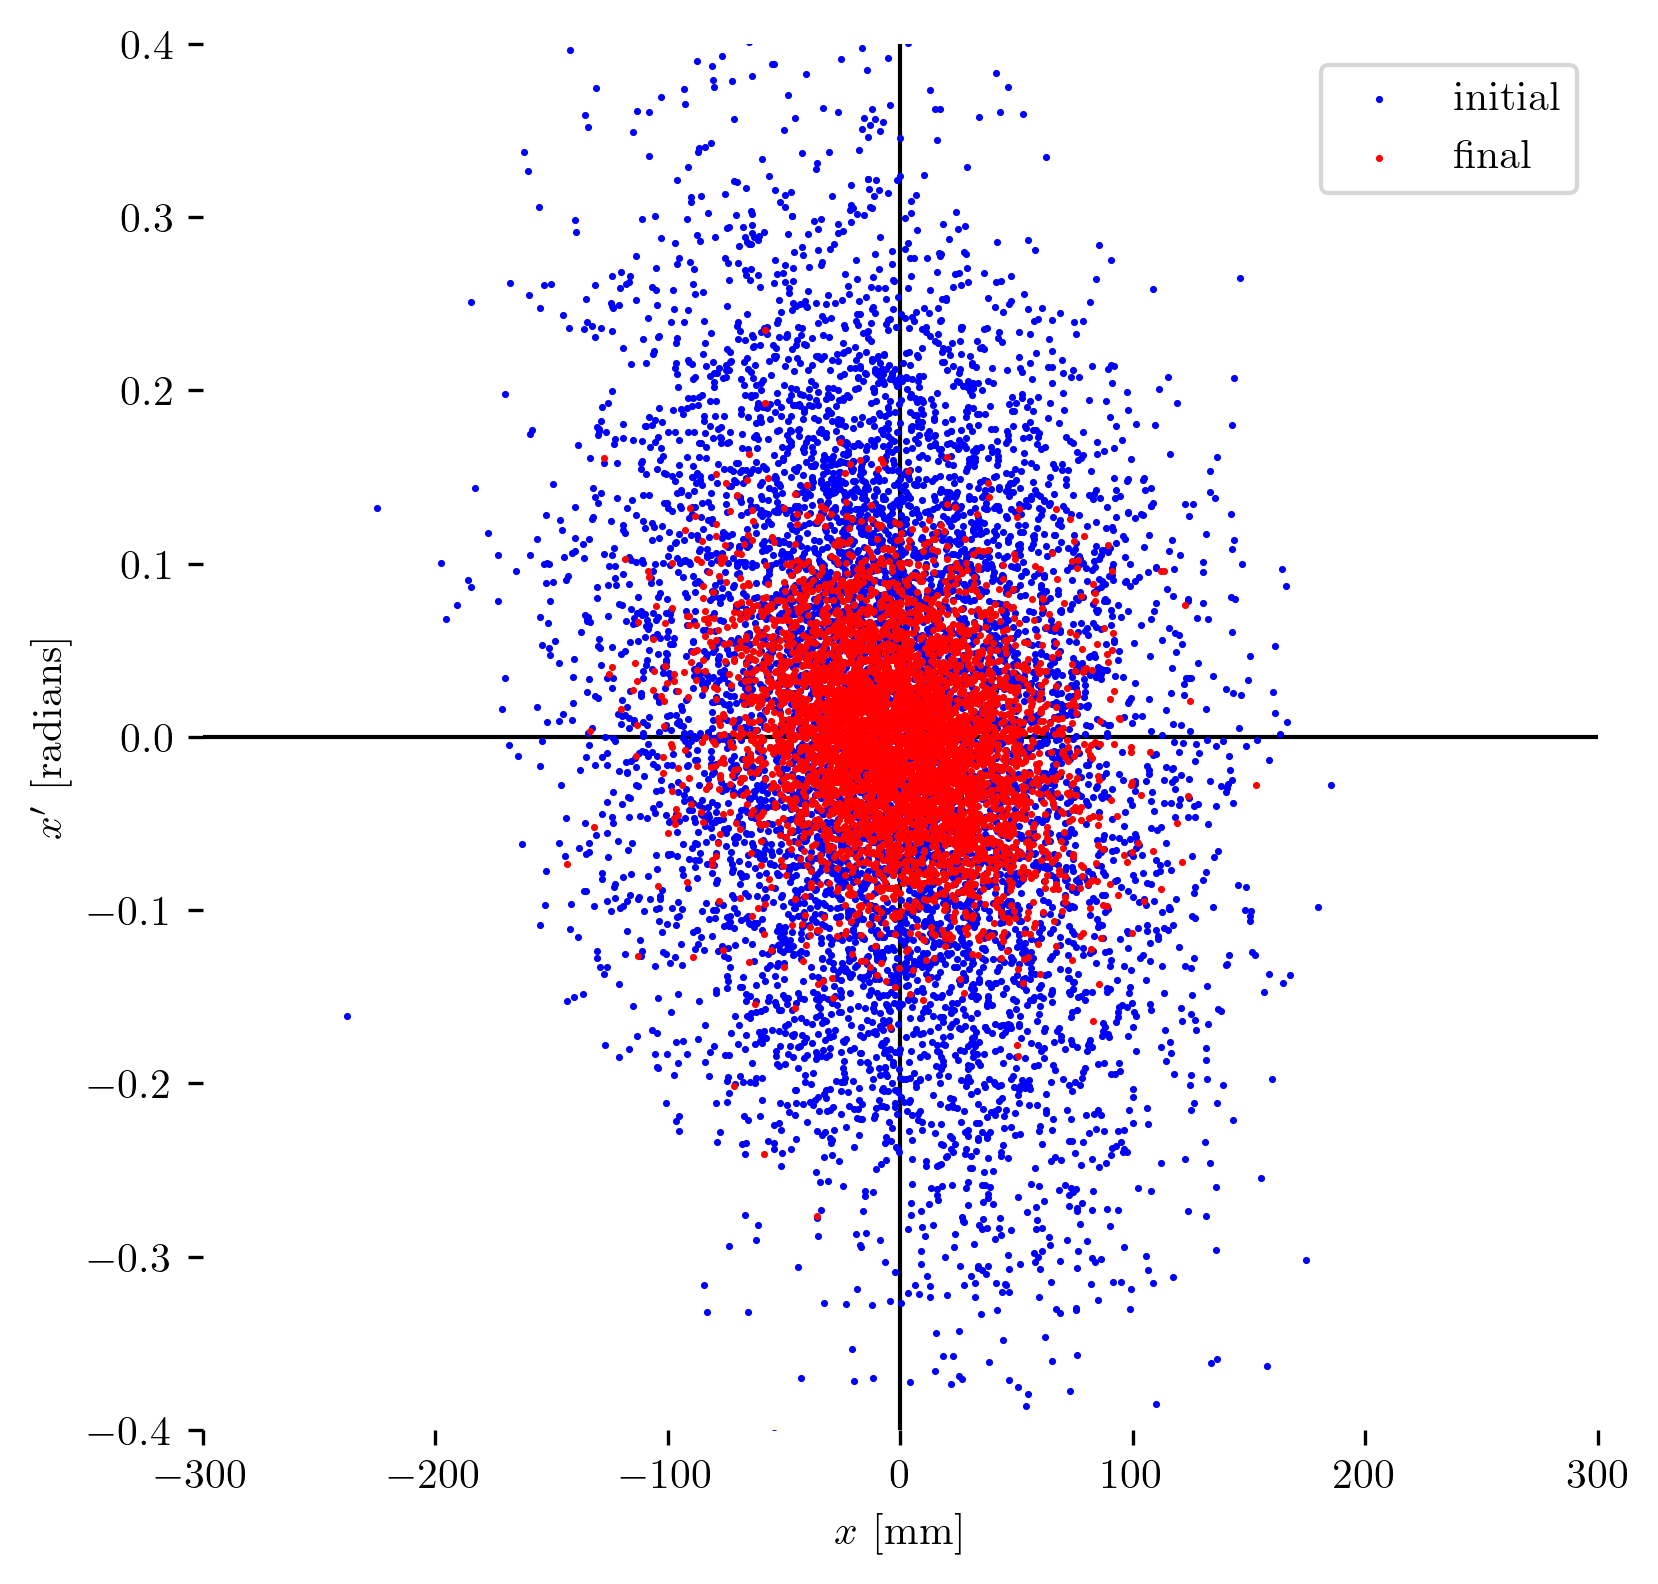

In [214]:
# Plot x' vs. x:
fig, ax = plt.subplots(figsize=(6,6))
for spine in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[spine].set_visible(False)
plt.axhline(0, color='black', linewidth=1, zorder=-10)
plt.axvline(0, color='black', linewidth=1, zorder=-10)
plt.scatter(x_vals[0],xp_vals[0],color='blue',label='initial',s=0.5)
plt.scatter(x_vals[ndet-1],xp_vals[ndet-1],color='red',label='final',s=0.5)
plt.xlim(-300,300)
plt.ylim(-0.4,0.4)
plt.xlabel('$x$ [mm]')
plt.ylabel(r'$x^{\prime}$ [radians]')
plt.legend()
plt.show()

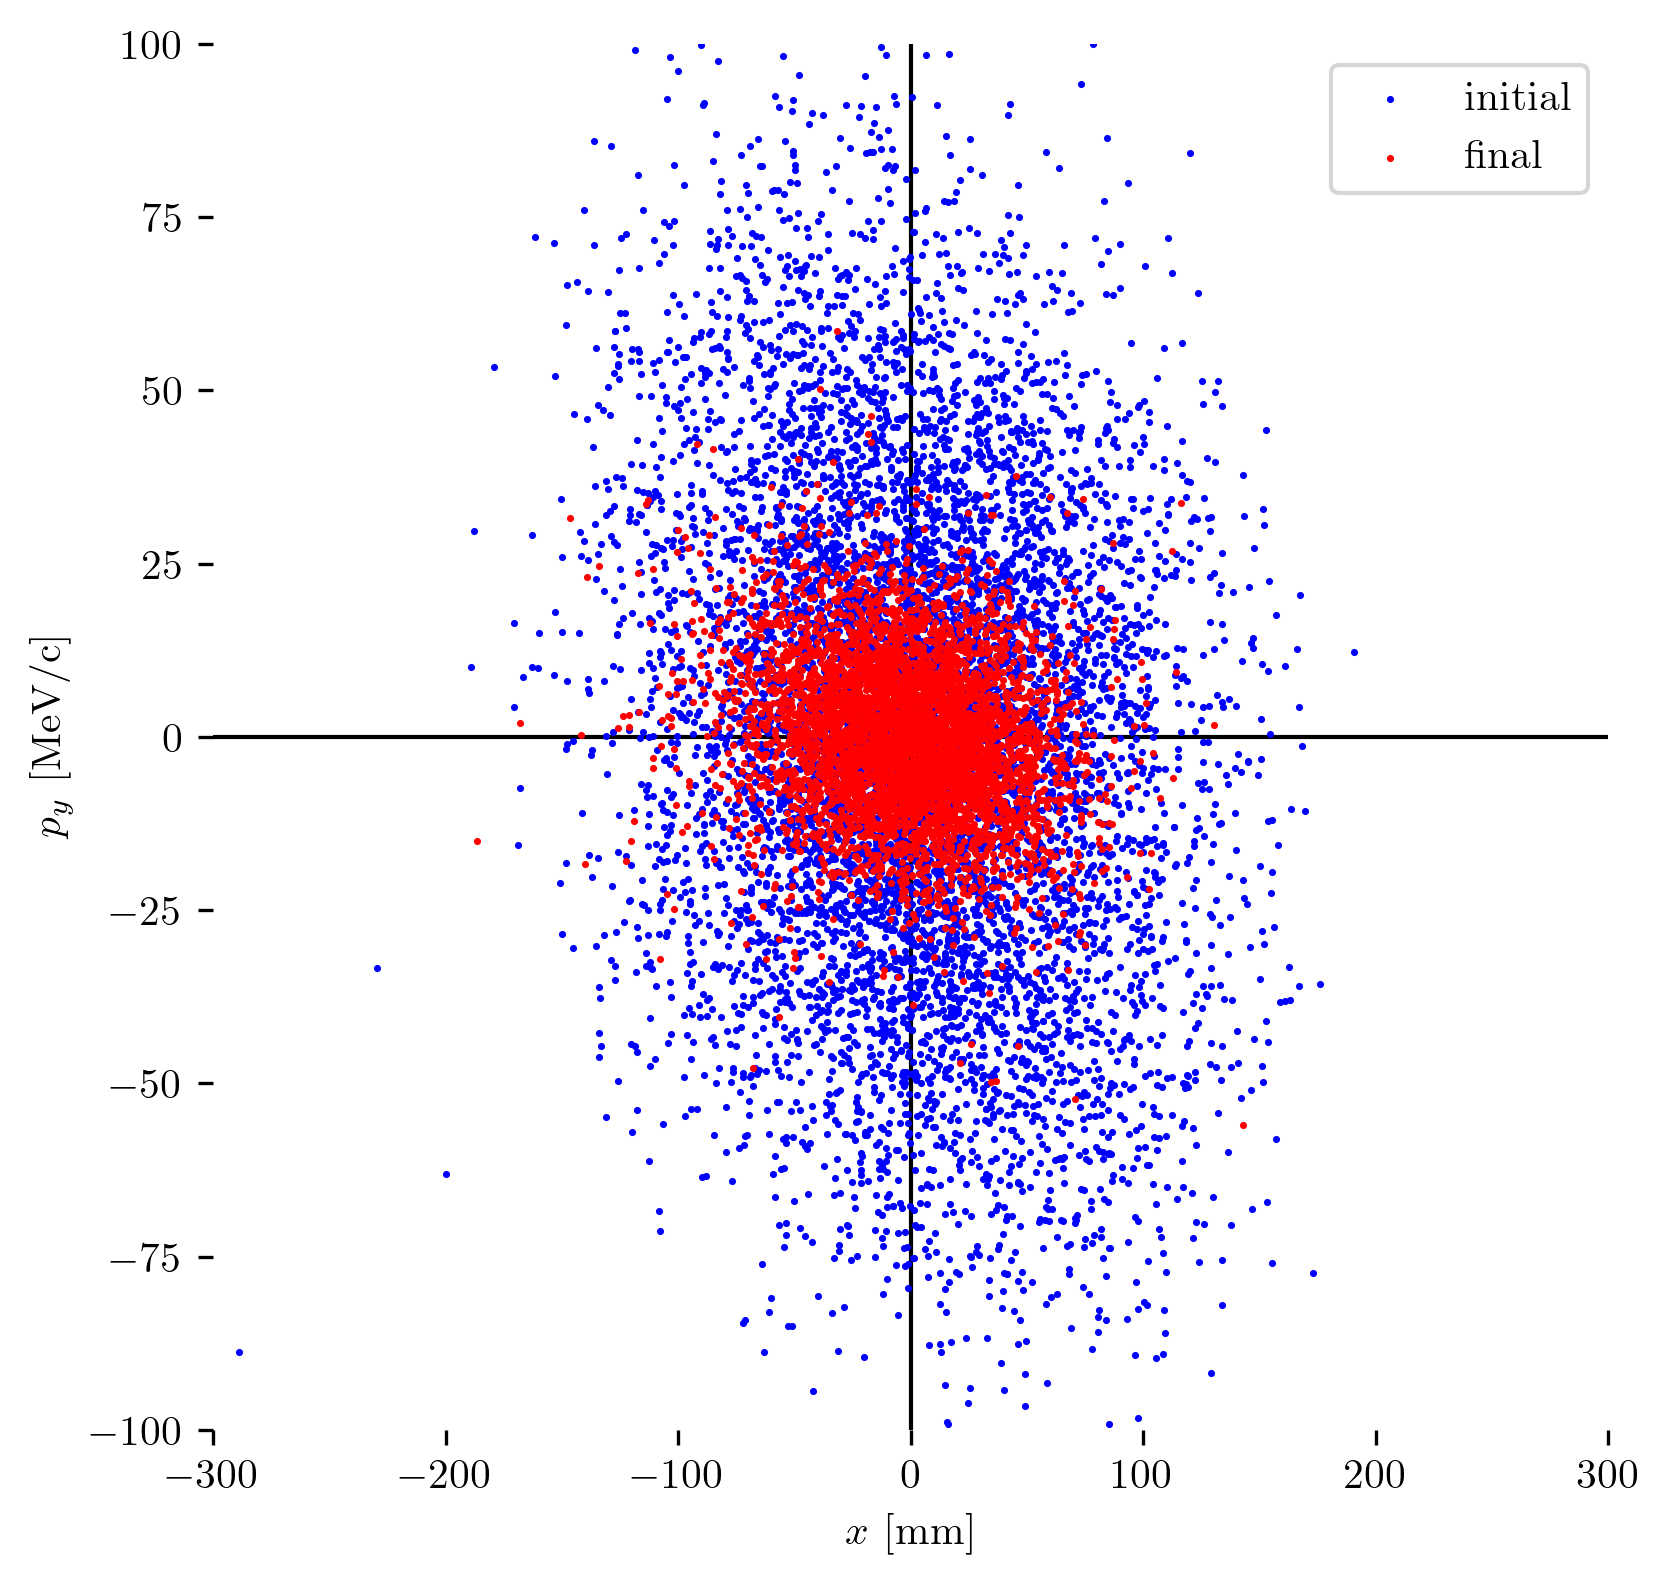

In [215]:
# Plot p_y vs. y:
fig, ax = plt.subplots(figsize=(6,6))
for spine in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[spine].set_visible(False)
plt.axhline(0, color='black', linewidth=1, zorder=-10)
plt.axvline(0, color='black', linewidth=1, zorder=-10)
plt.scatter(y_vals[0],py_vals[0],color='blue',label='initial',s=0.5)
plt.scatter(y_vals[ndet-1],py_vals[ndet-1],color='red',label='final',s=0.5)
plt.xlim(-300,300)
plt.ylim(-100,100)
plt.xlabel('$x$ [mm]')
plt.ylabel('$p_y$ [MeV/c]')
plt.legend()
plt.show()

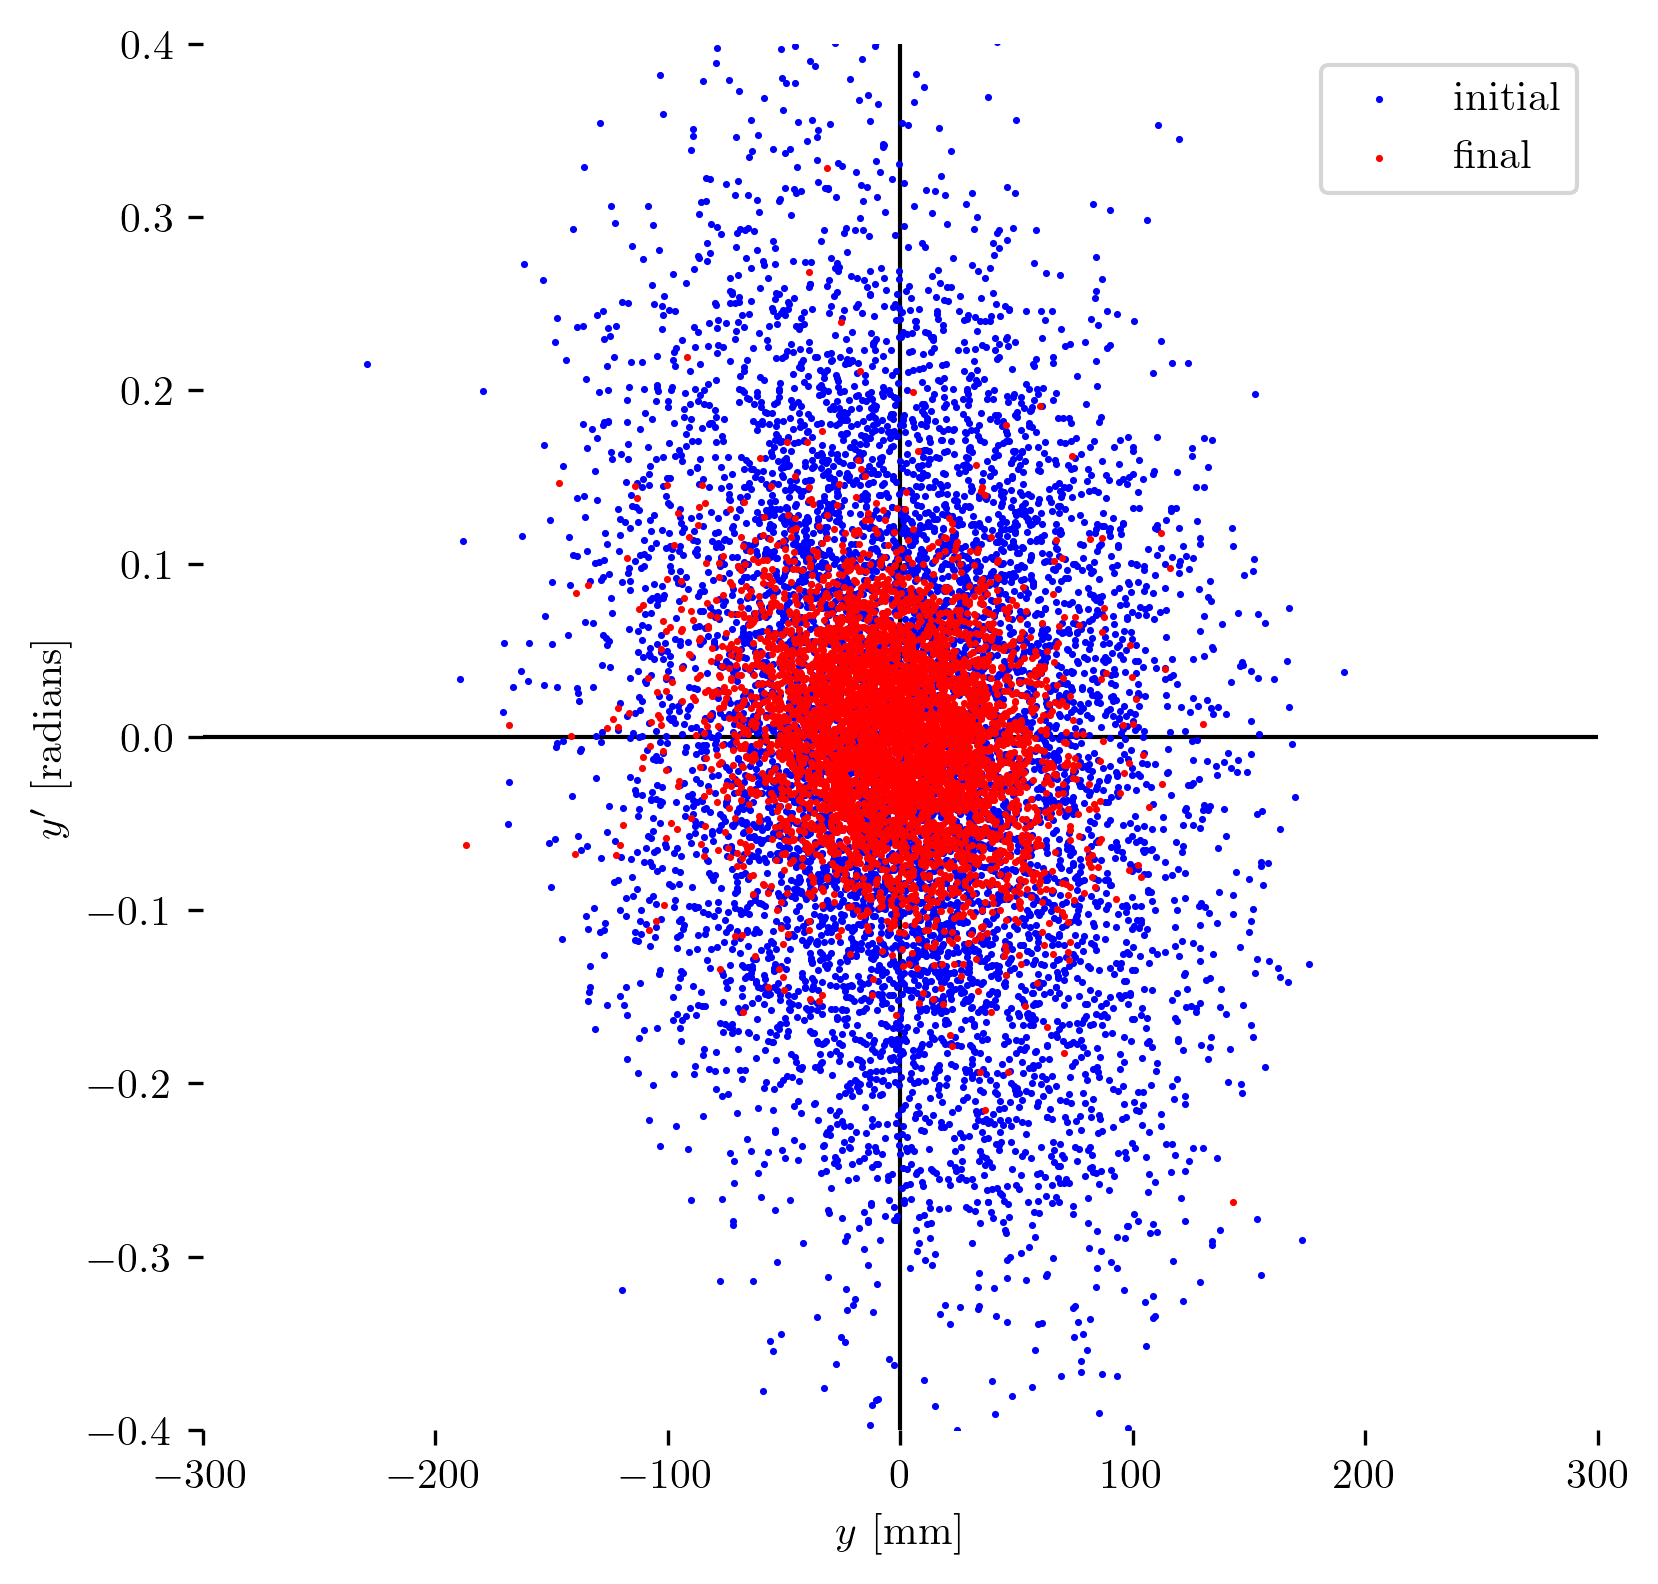

In [216]:
# Plot y' vs. y:
fig, ax = plt.subplots(figsize=(6,6))
for spine in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[spine].set_visible(False)
plt.axhline(0, color='black', linewidth=1, zorder=-10)
plt.axvline(0, color='black', linewidth=1, zorder=-10)
plt.scatter(y_vals[0],yp_vals[0],color='blue',label='initial',s=0.5)
plt.scatter(y_vals[ndet-1],yp_vals[ndet-1],color='red',label='final',s=0.5)
plt.xlim(-300,300)
plt.ylim(-0.4,0.4)
plt.xlabel('$y$ [mm]')
plt.ylabel(r'$y^{\prime}$ [radians]')
plt.legend()
plt.show()

In [217]:
# Compute mod(t,T):
def modtT(t):
    mod = []
    for i in range(len(t)):
        mod.append(t[i] % T)
    return mod
mod_initial = modtT(t_vals[0])
mod_final = modtT(t_vals[ndet-1])

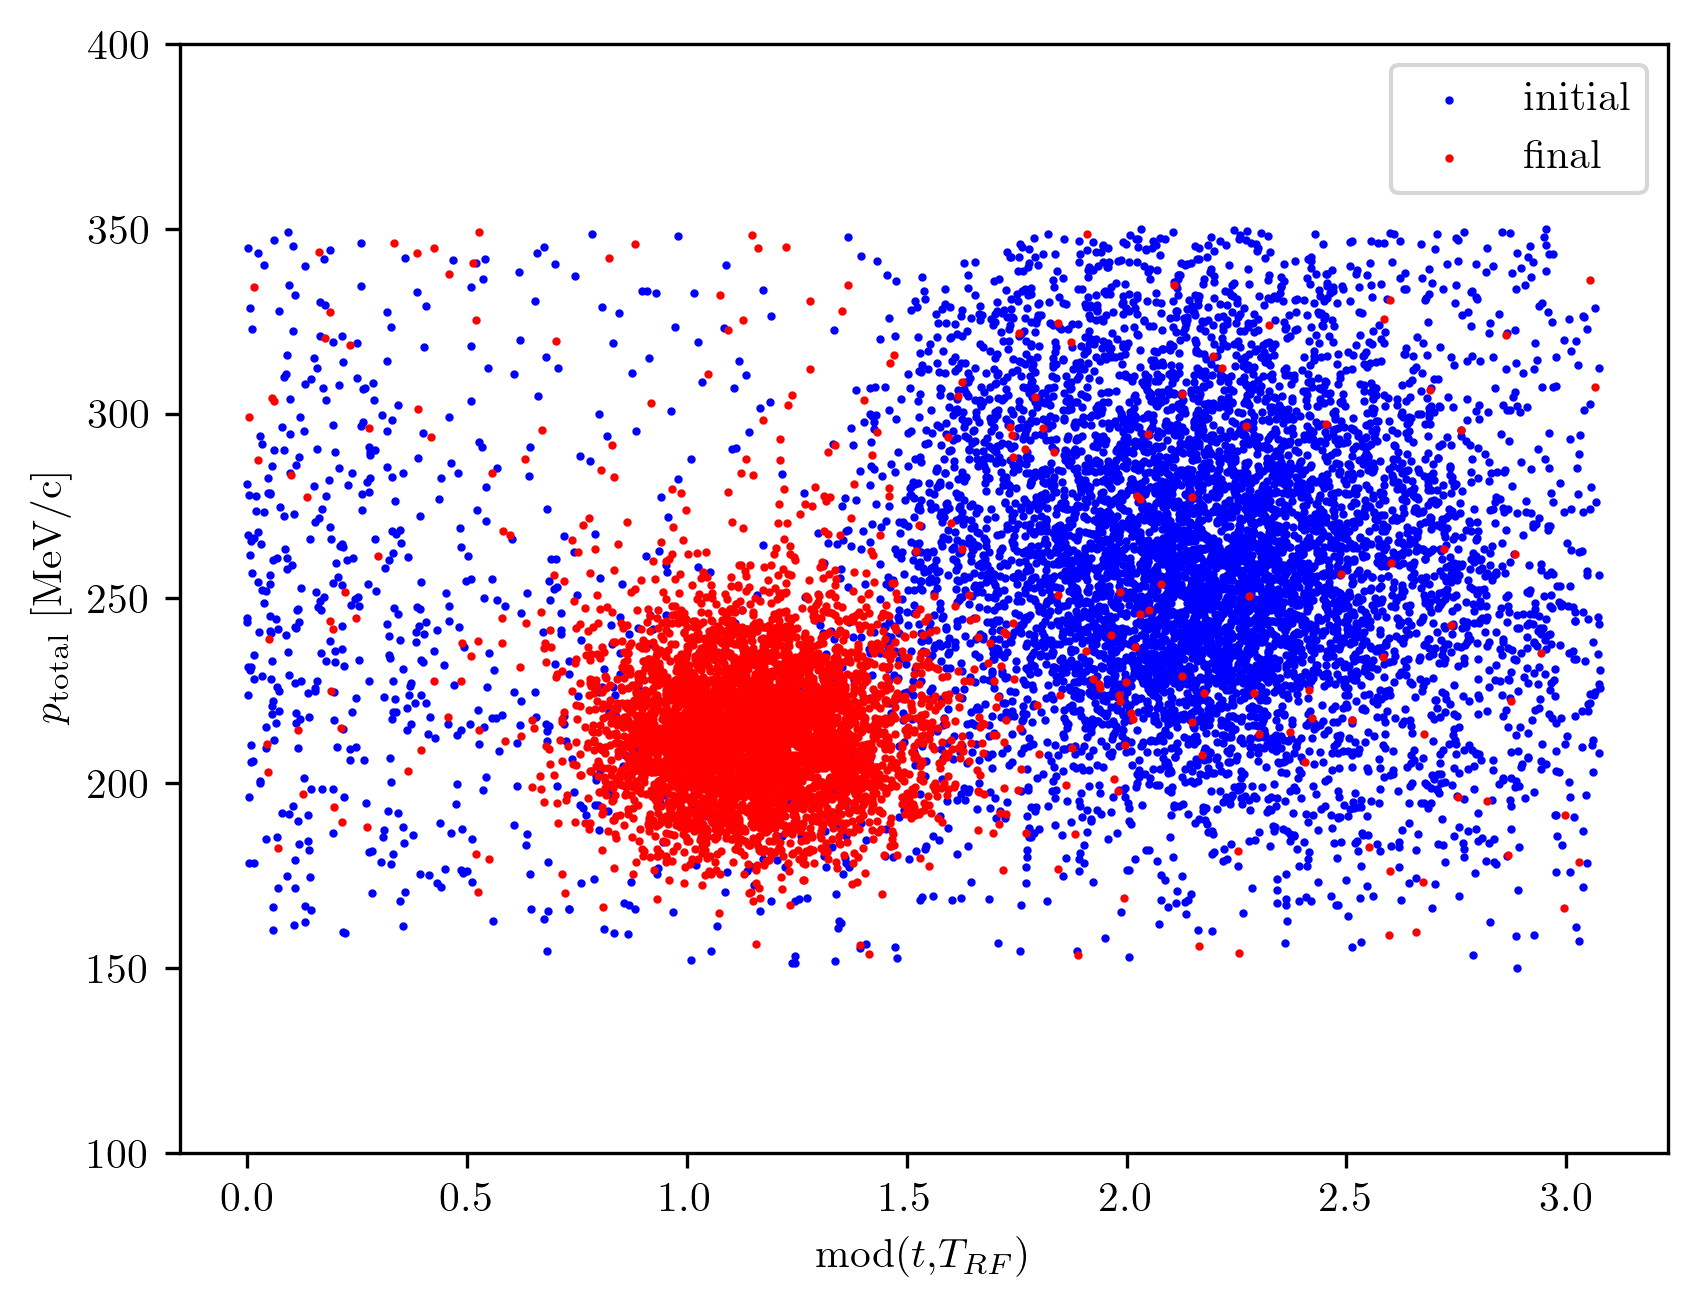

In [218]:
# Plot p_total vs. mod(t,T):
plt.scatter(mod_initial,ptotal_vals[0],color='blue',label='initial',s=1)
plt.scatter(mod_final,ptotal_vals[ndet-1],color='red',label='final',s=1)
plt.ylim(100,400)
plt.xlabel('mod($t$,$T_{RF}$)')
plt.ylabel(r'$p_{\text{total}}$ [MeV/c]')
plt.legend()
plt.show()

In [219]:
# Find mean position of p_total vs. mod(t,T) distributions:
mean_initial = np.mean(mod_initial)
mean_final = np.mean(mod_final)
print('Mean position of initial distribution: '+str(mean_initial))
print('Mean position of final distribution: '+str(mean_final))

Mean position of initial distribution: 2.043409370045533
Mean position of final distribution: 1.1675311868516272


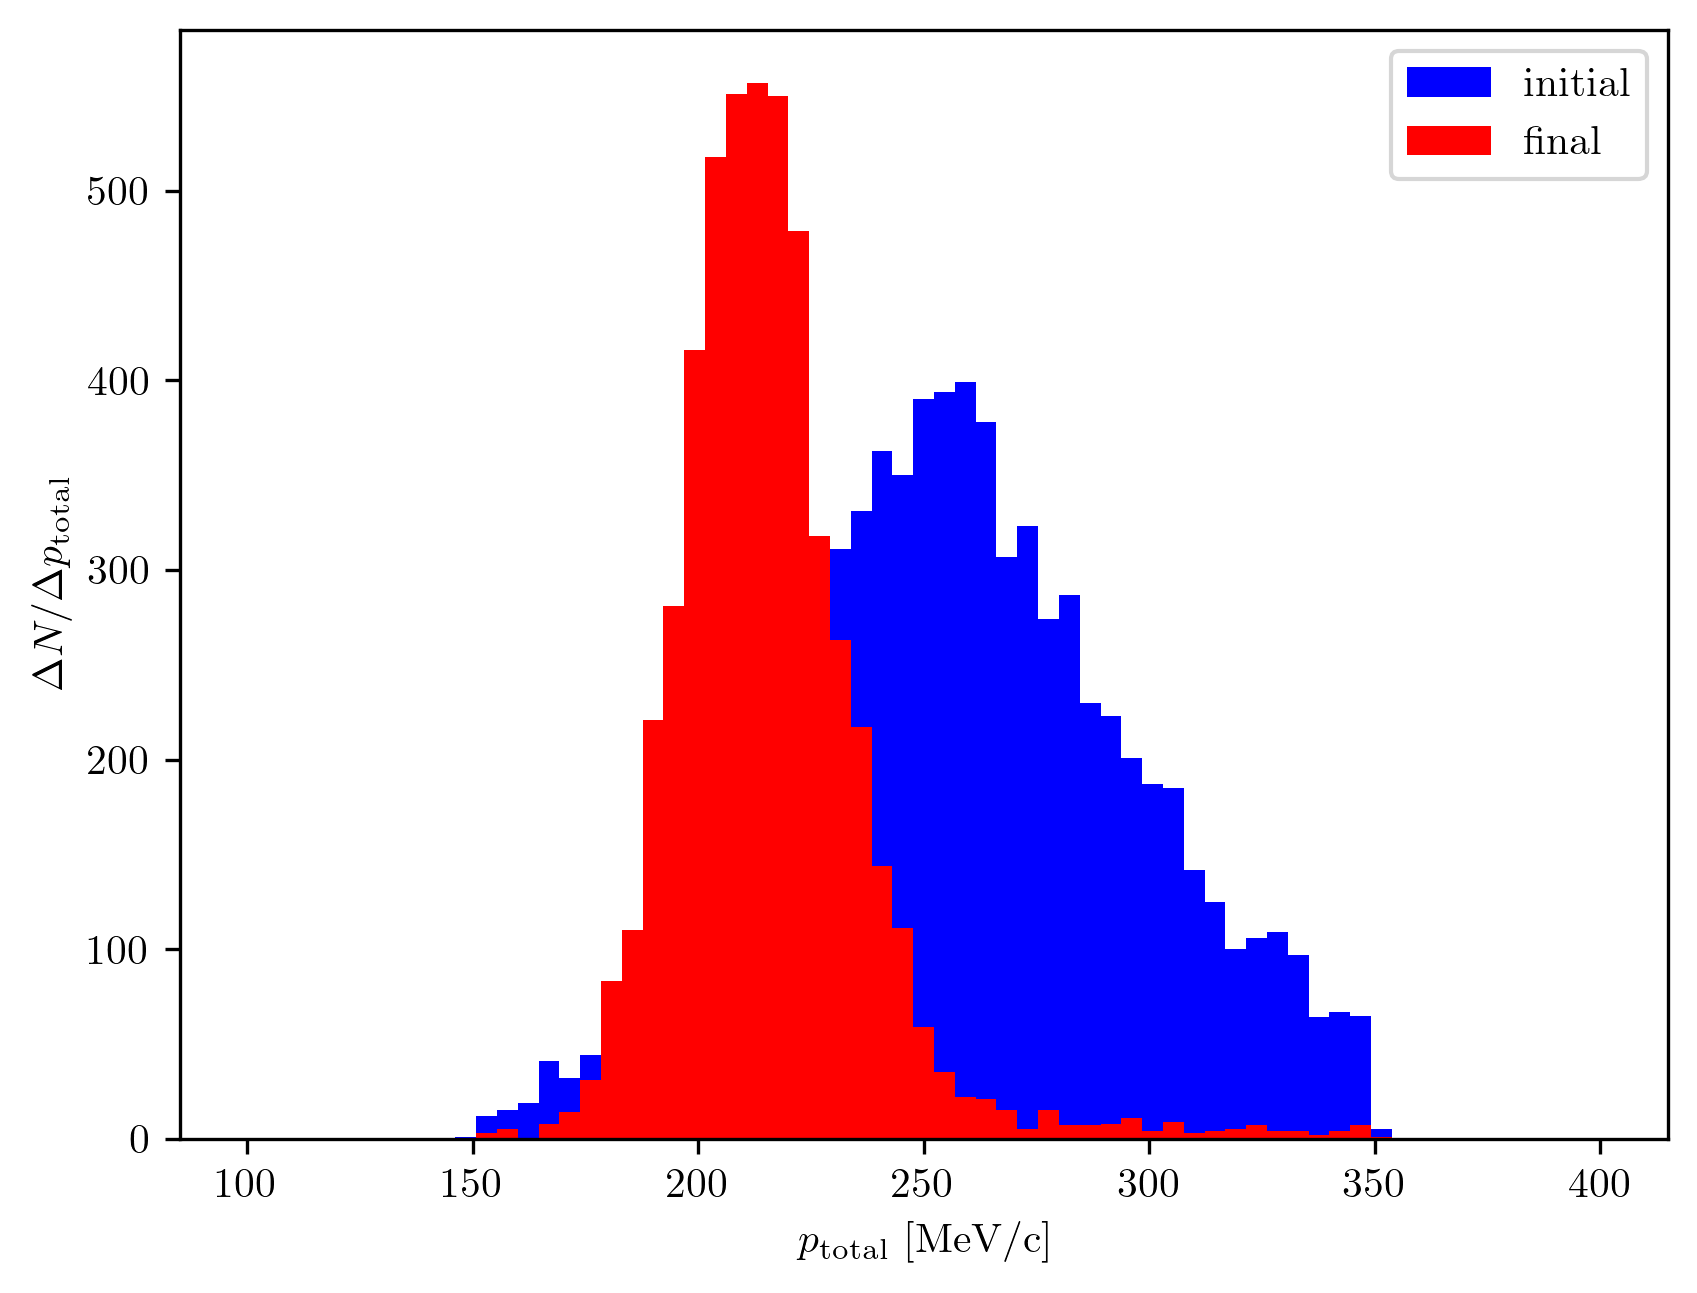

In [220]:
# Plot total p distribution:
plt.hist(ptotal_vals[0],color='blue',label='initial',bins=65,range=[100,400])
plt.hist(ptotal_vals[ndet-1],color='red',label='final',bins=65,range=[100,400])
plt.xlabel(r'$p_{\text{total}}$ [MeV/c]')
plt.ylabel(r'$\Delta N/ \Delta p_{\text{total}}$')
plt.legend()
plt.show()

In [221]:
# Compute beam loss down channel:
print('Initial N: '+str(len(z_vals[0])))
print('Final N: '+str(len(z_vals[len(z_vals)-1])))
loss = len(z_vals[ndet-1])/len(z_vals[0])
print('Transmission rate: '+str(loss))

Initial N: 7666
Final N: 5139
Transmission rate: 0.6703626402295851


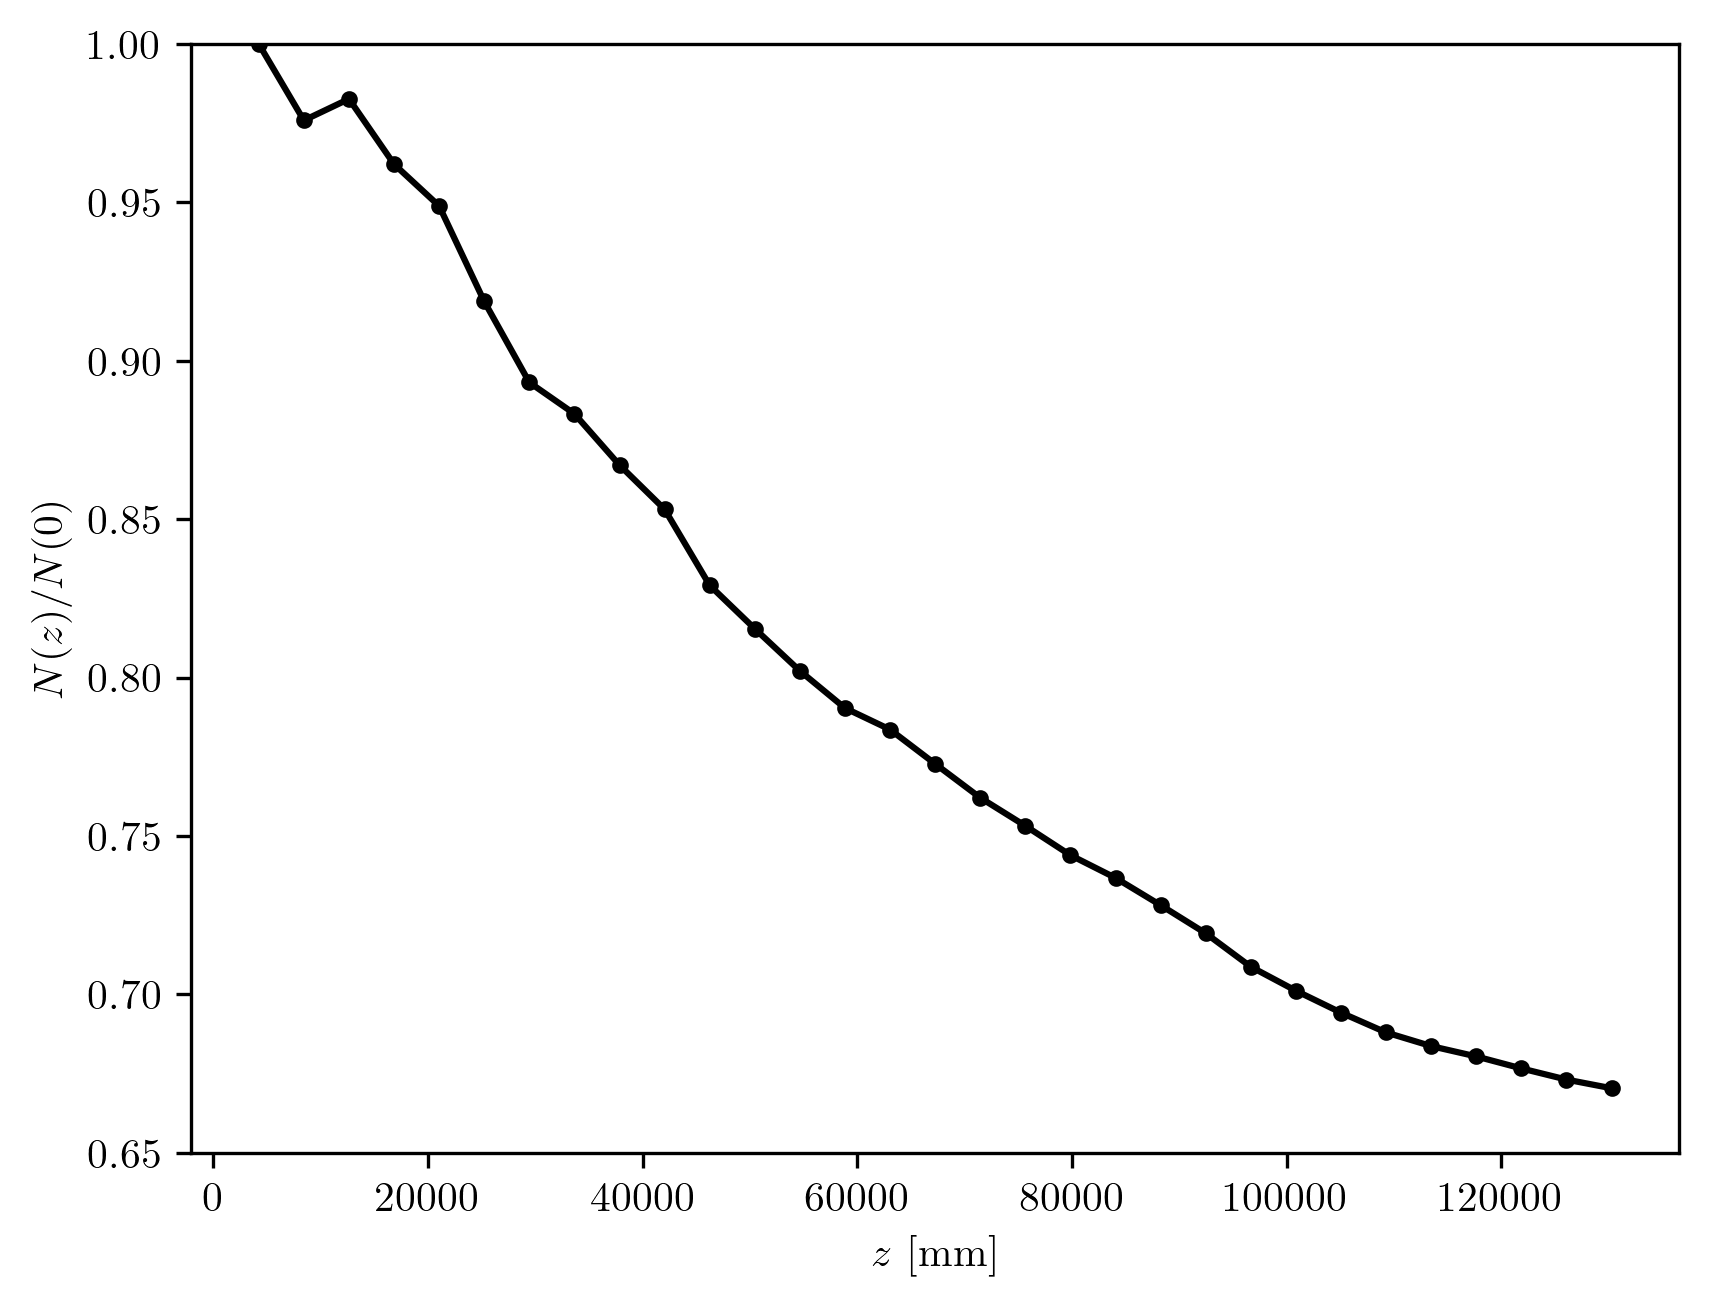

In [222]:
# Plot transmission rate vs. z:
plt.plot([i[0] for i in z_vals],[(len(i)/len(z_vals[0])) for i in z_vals],marker='.',color='black')
plt.xlabel('$z$ [mm]')
plt.ylabel('$N(z)/N(0)$')
plt.ylim((0.65,1))
plt.show()

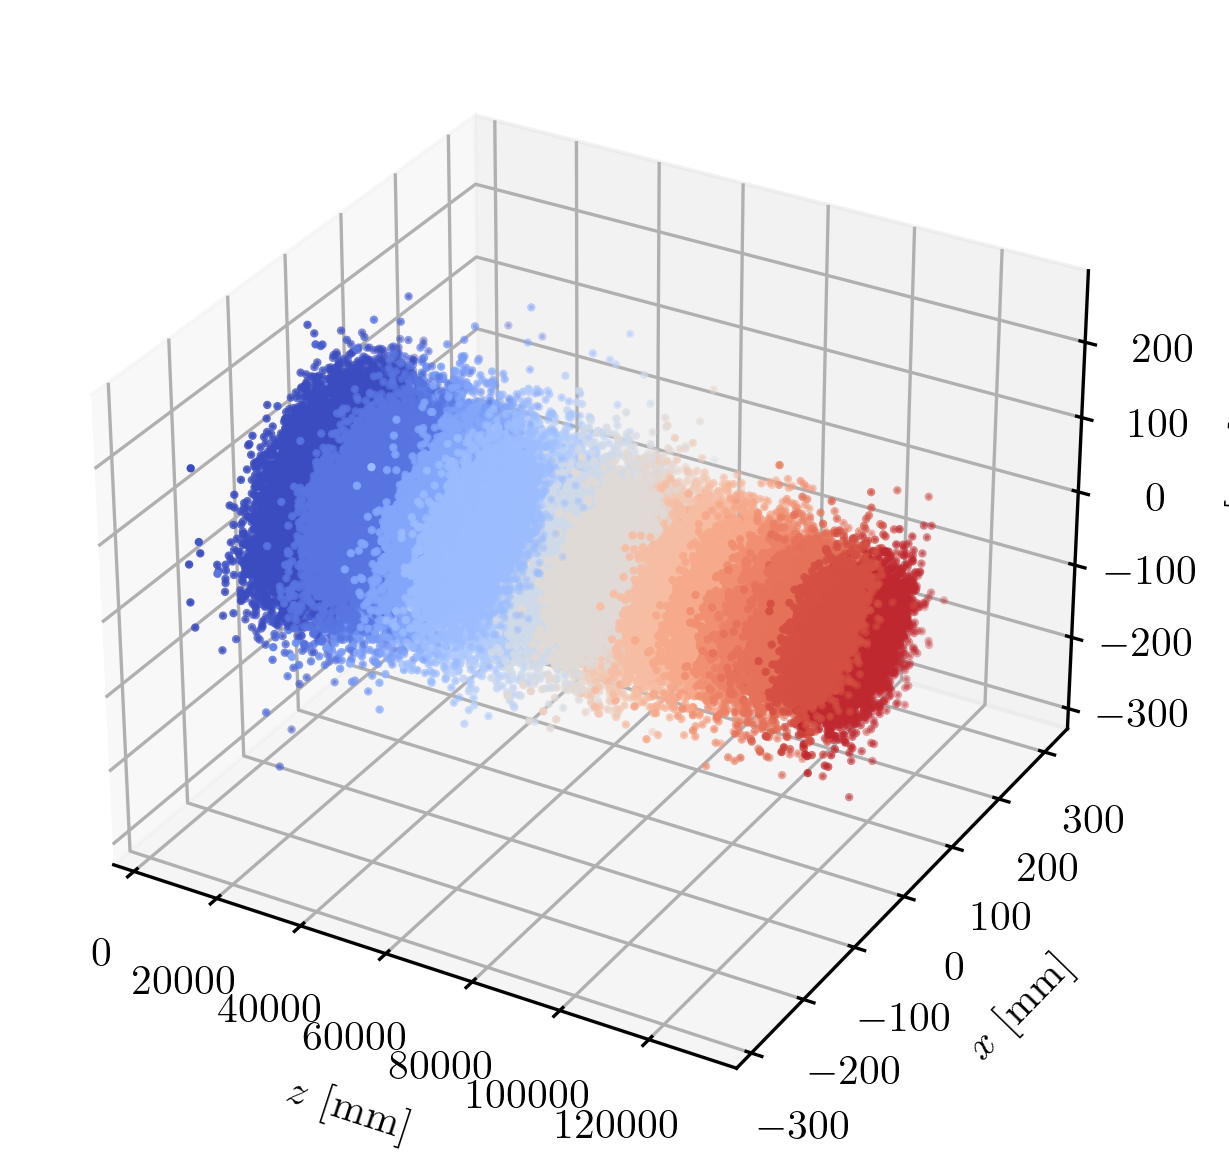

In [223]:
# 3D plot of spatial distribution at each detector:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cmap = plt.get_cmap('coolwarm')
for i in range(len(z_vals)):
    color = cmap(i/len(z_vals))
    ax.scatter(z_vals[i],x_vals[i],y_vals[i],color=color,s=1)
ax.set_xlabel('$z$ [mm]')
ax.set_ylabel('$x$ [mm]')
ax.set_zlabel('$y$ [mm]')
plt.show()

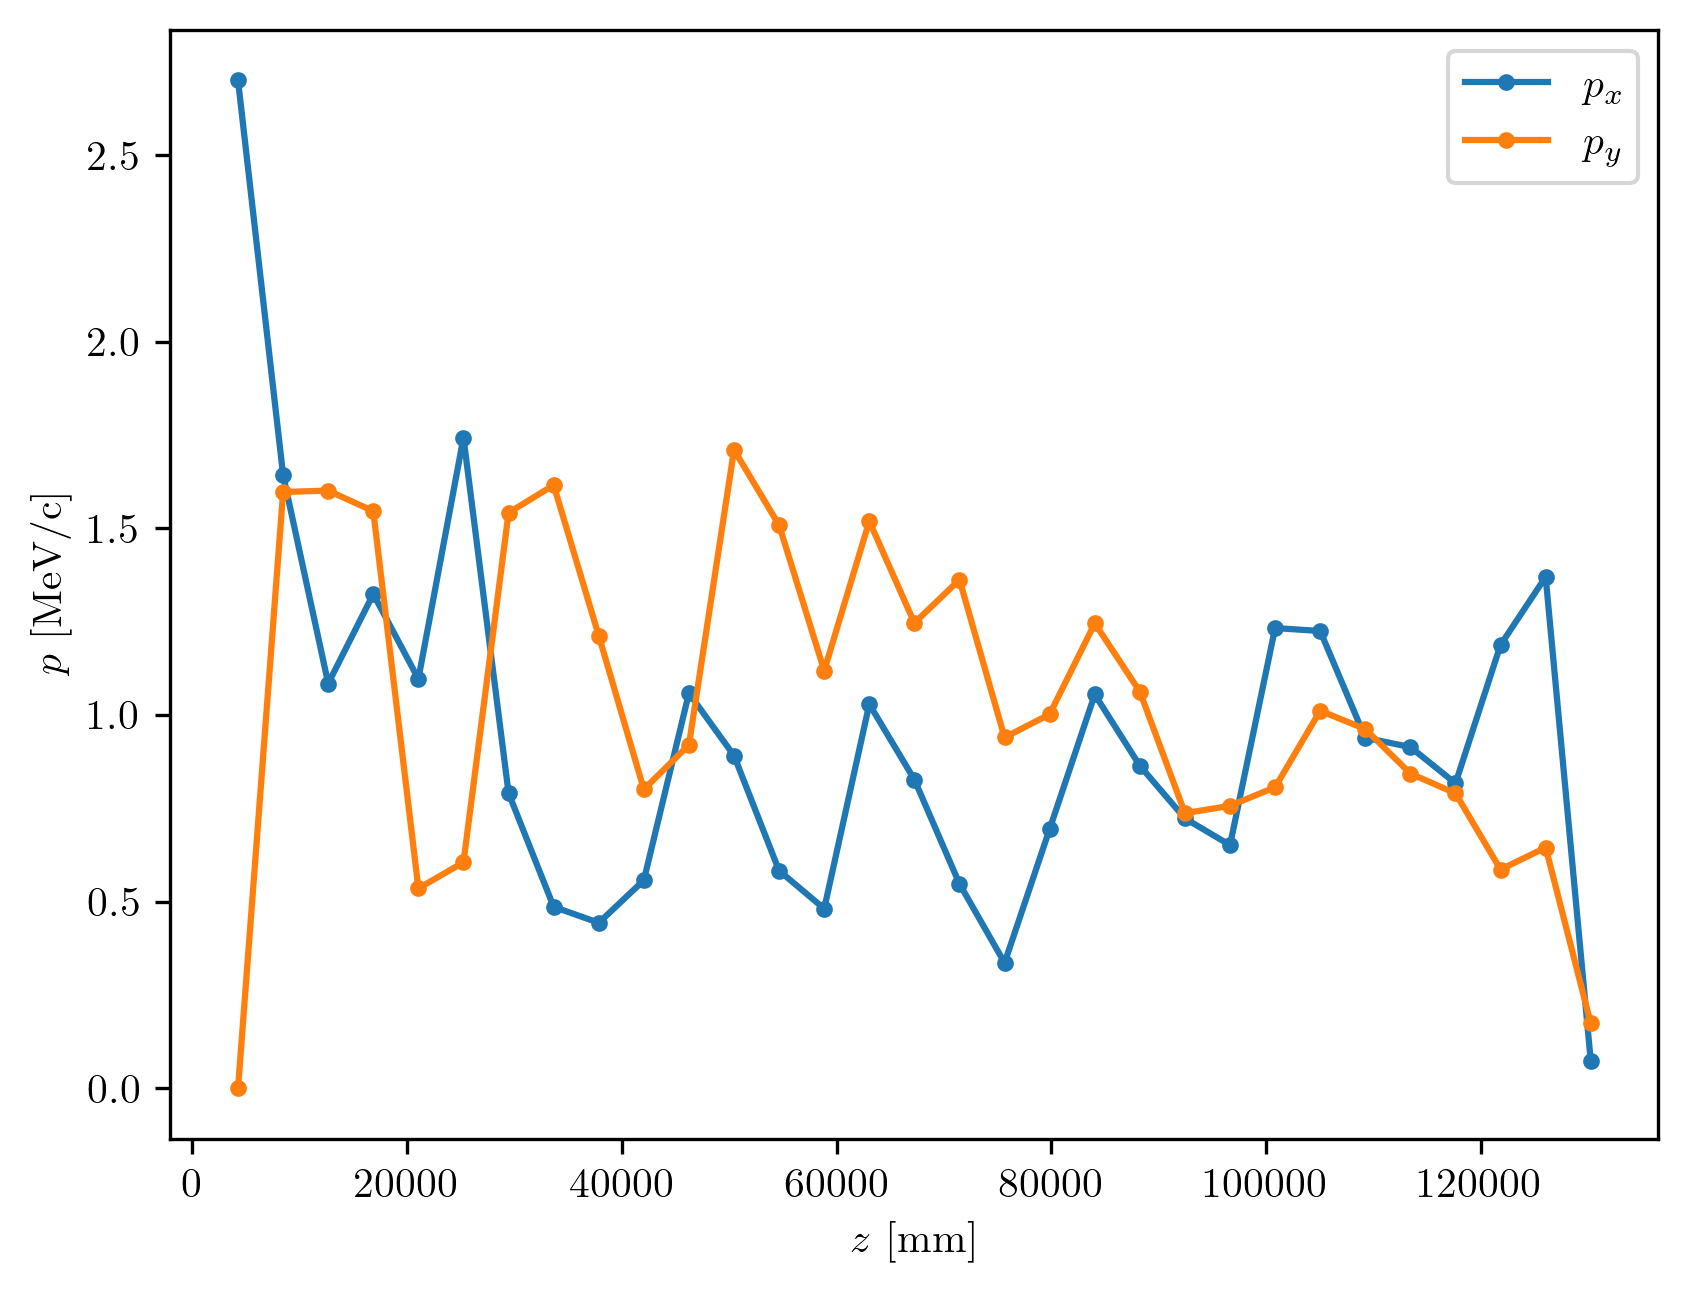

In [224]:
# Plot average p_x, p_y along channel:
px_avgs = []; py_avgs = []
for i in range(ndet):
    px_avgs.append(np.average(px_vals[i]))
    py_avgs.append(np.average(py_vals[i]))
plt.plot([i[0] for i in z_vals], px_avgs, marker='.', label='$p_x$',color='tab:blue')
plt.plot([i[0] for i in z_vals], py_avgs, marker='.', label='$p_y$',color='tab:orange')
plt.ylabel('$p$ [MeV/c]')
plt.xlabel('$z$ [mm]')
plt.legend()
plt.show()

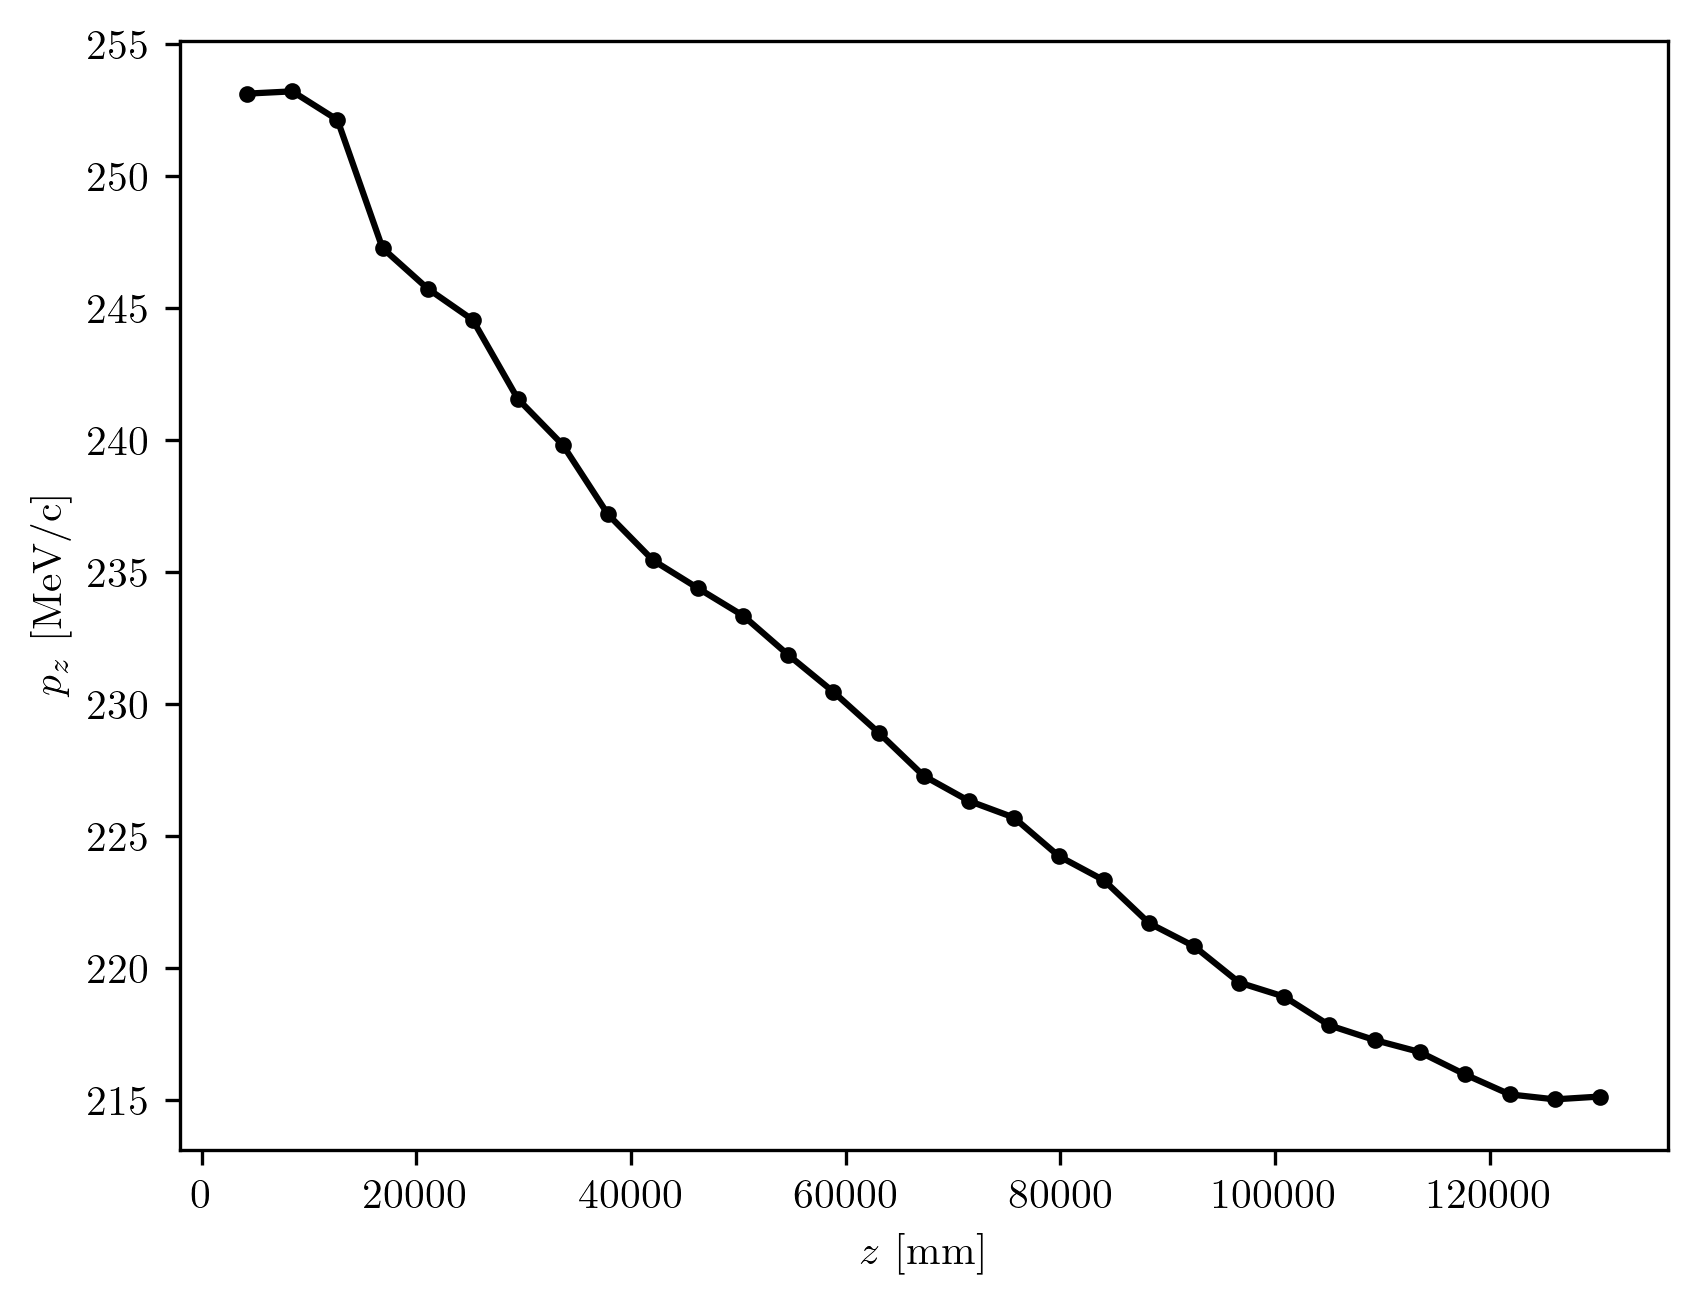

In [225]:
# Plot average p_z along channel:
pz_avgs = []
for i in range(ndet):
    pz_avgs.append(np.average(pz_vals[i]))
plt.plot([i[0] for i in z_vals], pz_avgs, marker='.',color='black')
plt.ylabel('$p_z$ [MeV/c]')
plt.xlabel('$z$ [mm]')
plt.show()

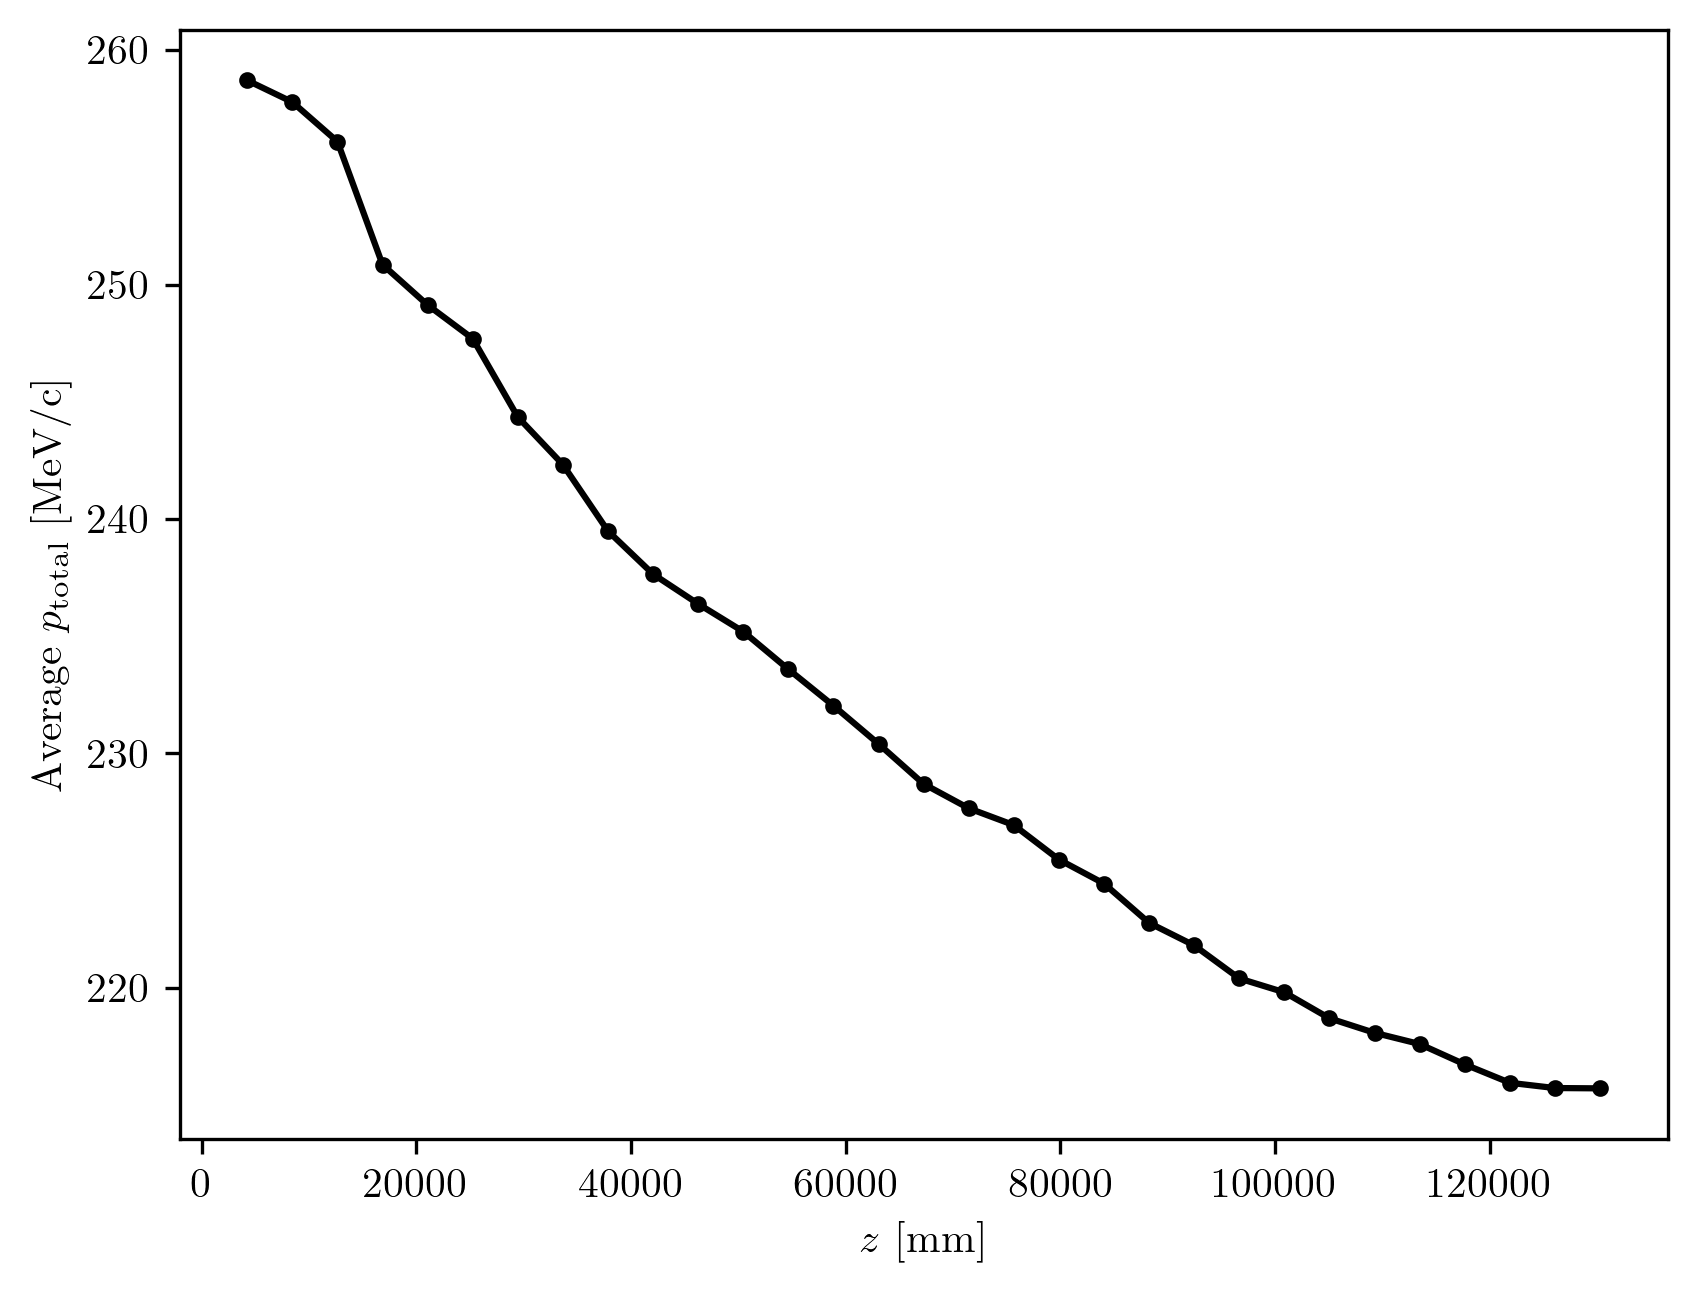

In [226]:
# Plot average total momentum along channel:
ptotal_avgs = []; ptotal_med = []
for i in range(ndet):
    ptotal_avgs.append(np.average(ptotal_vals[i]))
    ptotal_med.append(np.median(ptotal_vals[i]))
plt.plot([i[0] for i in z_vals], ptotal_avgs, marker='.',color='black')
plt.ylabel(r'Average $p_{\text{total}}$ [MeV/c]')
plt.xlabel('$z$ [mm]')
plt.show()

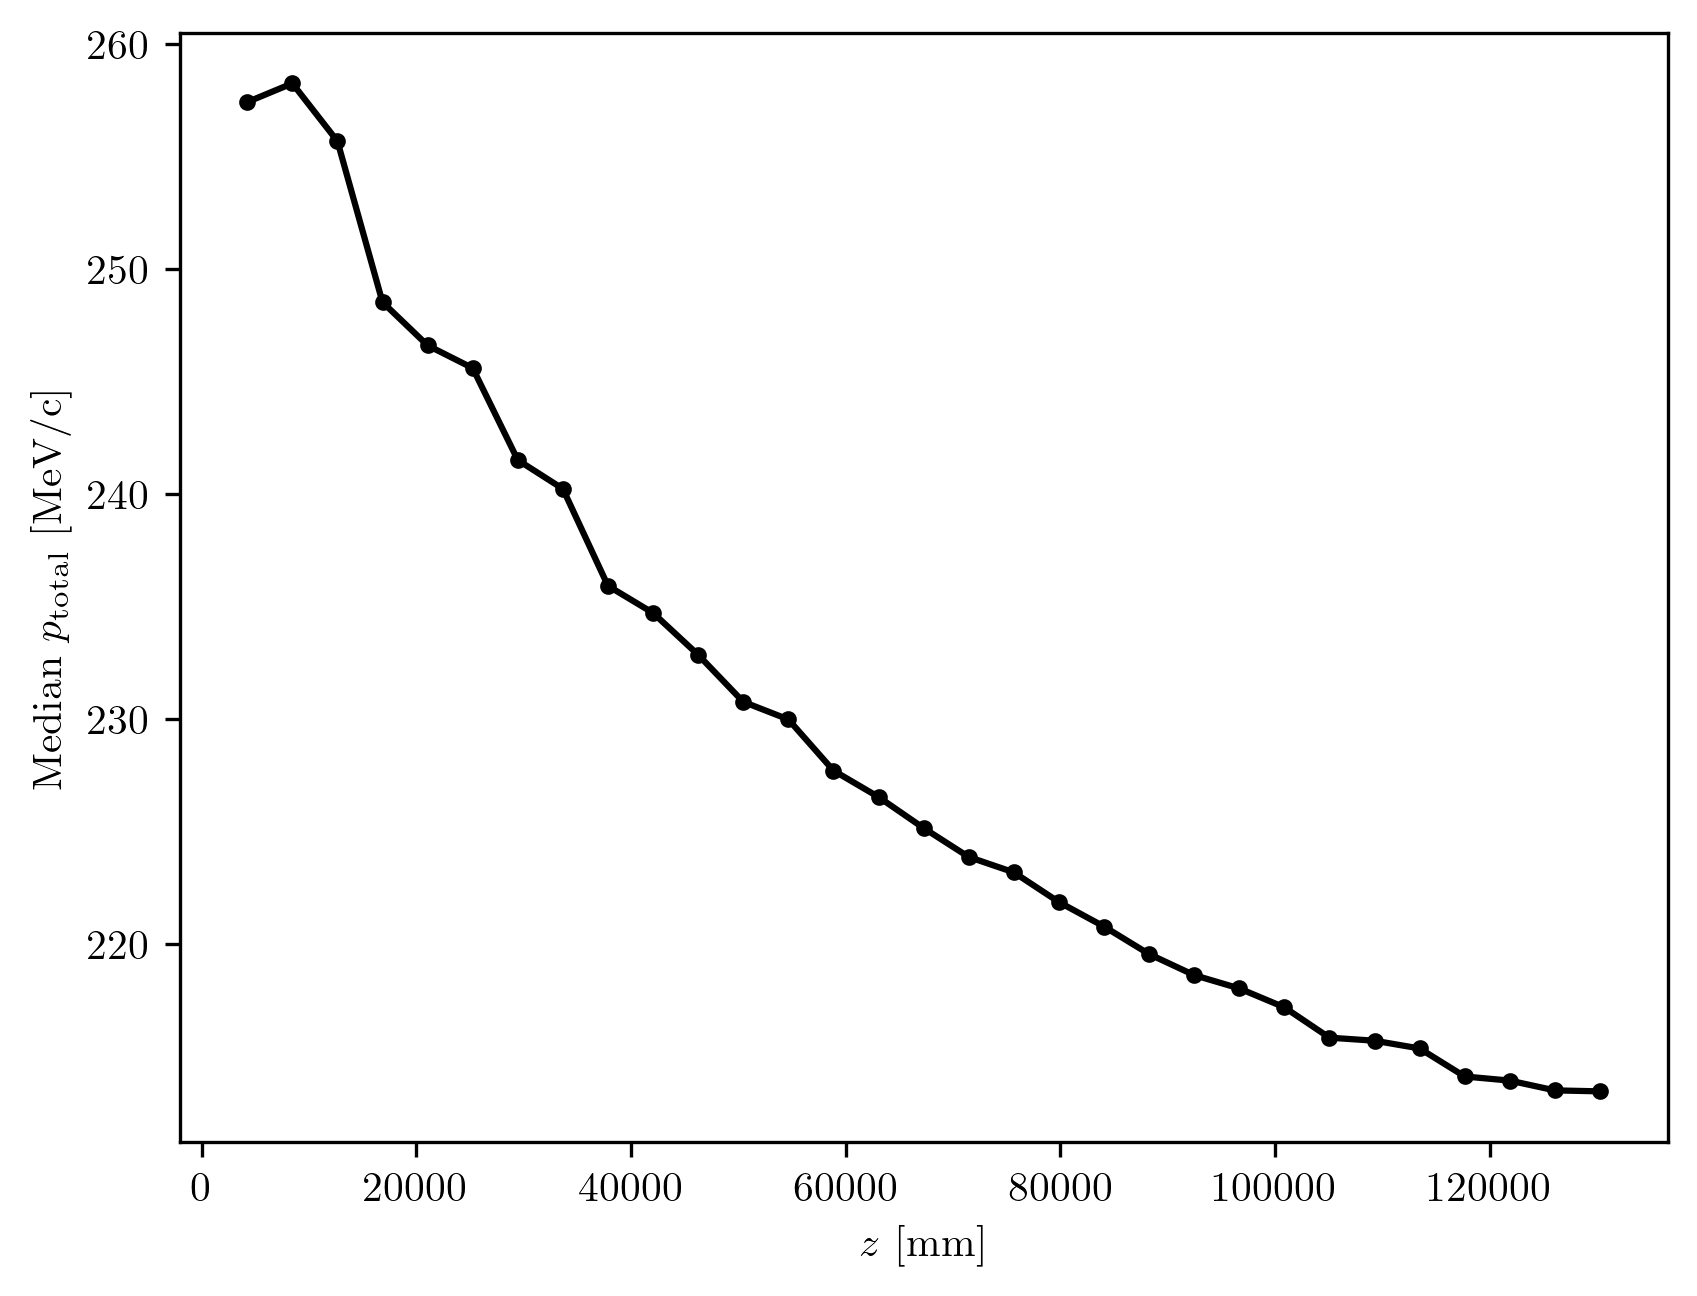

In [227]:
# Plot median total momentum along channel:
plt.plot([i[0] for i in z_vals], ptotal_med, marker='.',color='black')
plt.ylabel(r'Median $p_{\text{total}}$ [MeV/c]')
plt.xlabel('$z$ [mm]')
plt.show()

In [228]:
print(f'Initial average momentum: {ptotal_avgs[0]}')
print(f'Final average momentum: {ptotal_avgs[len(ptotal_avgs)-1]}')
print(f'Initial median momentum: {ptotal_med[0]}')
print(f'Final median momentum: {ptotal_med[len(ptotal_med)-1]}')

Initial average momentum: 258.7057359003619
Final average momentum: 215.7196556114447
Initial median momentum: 257.39968857024064
Final median momentum: 213.4422749369253


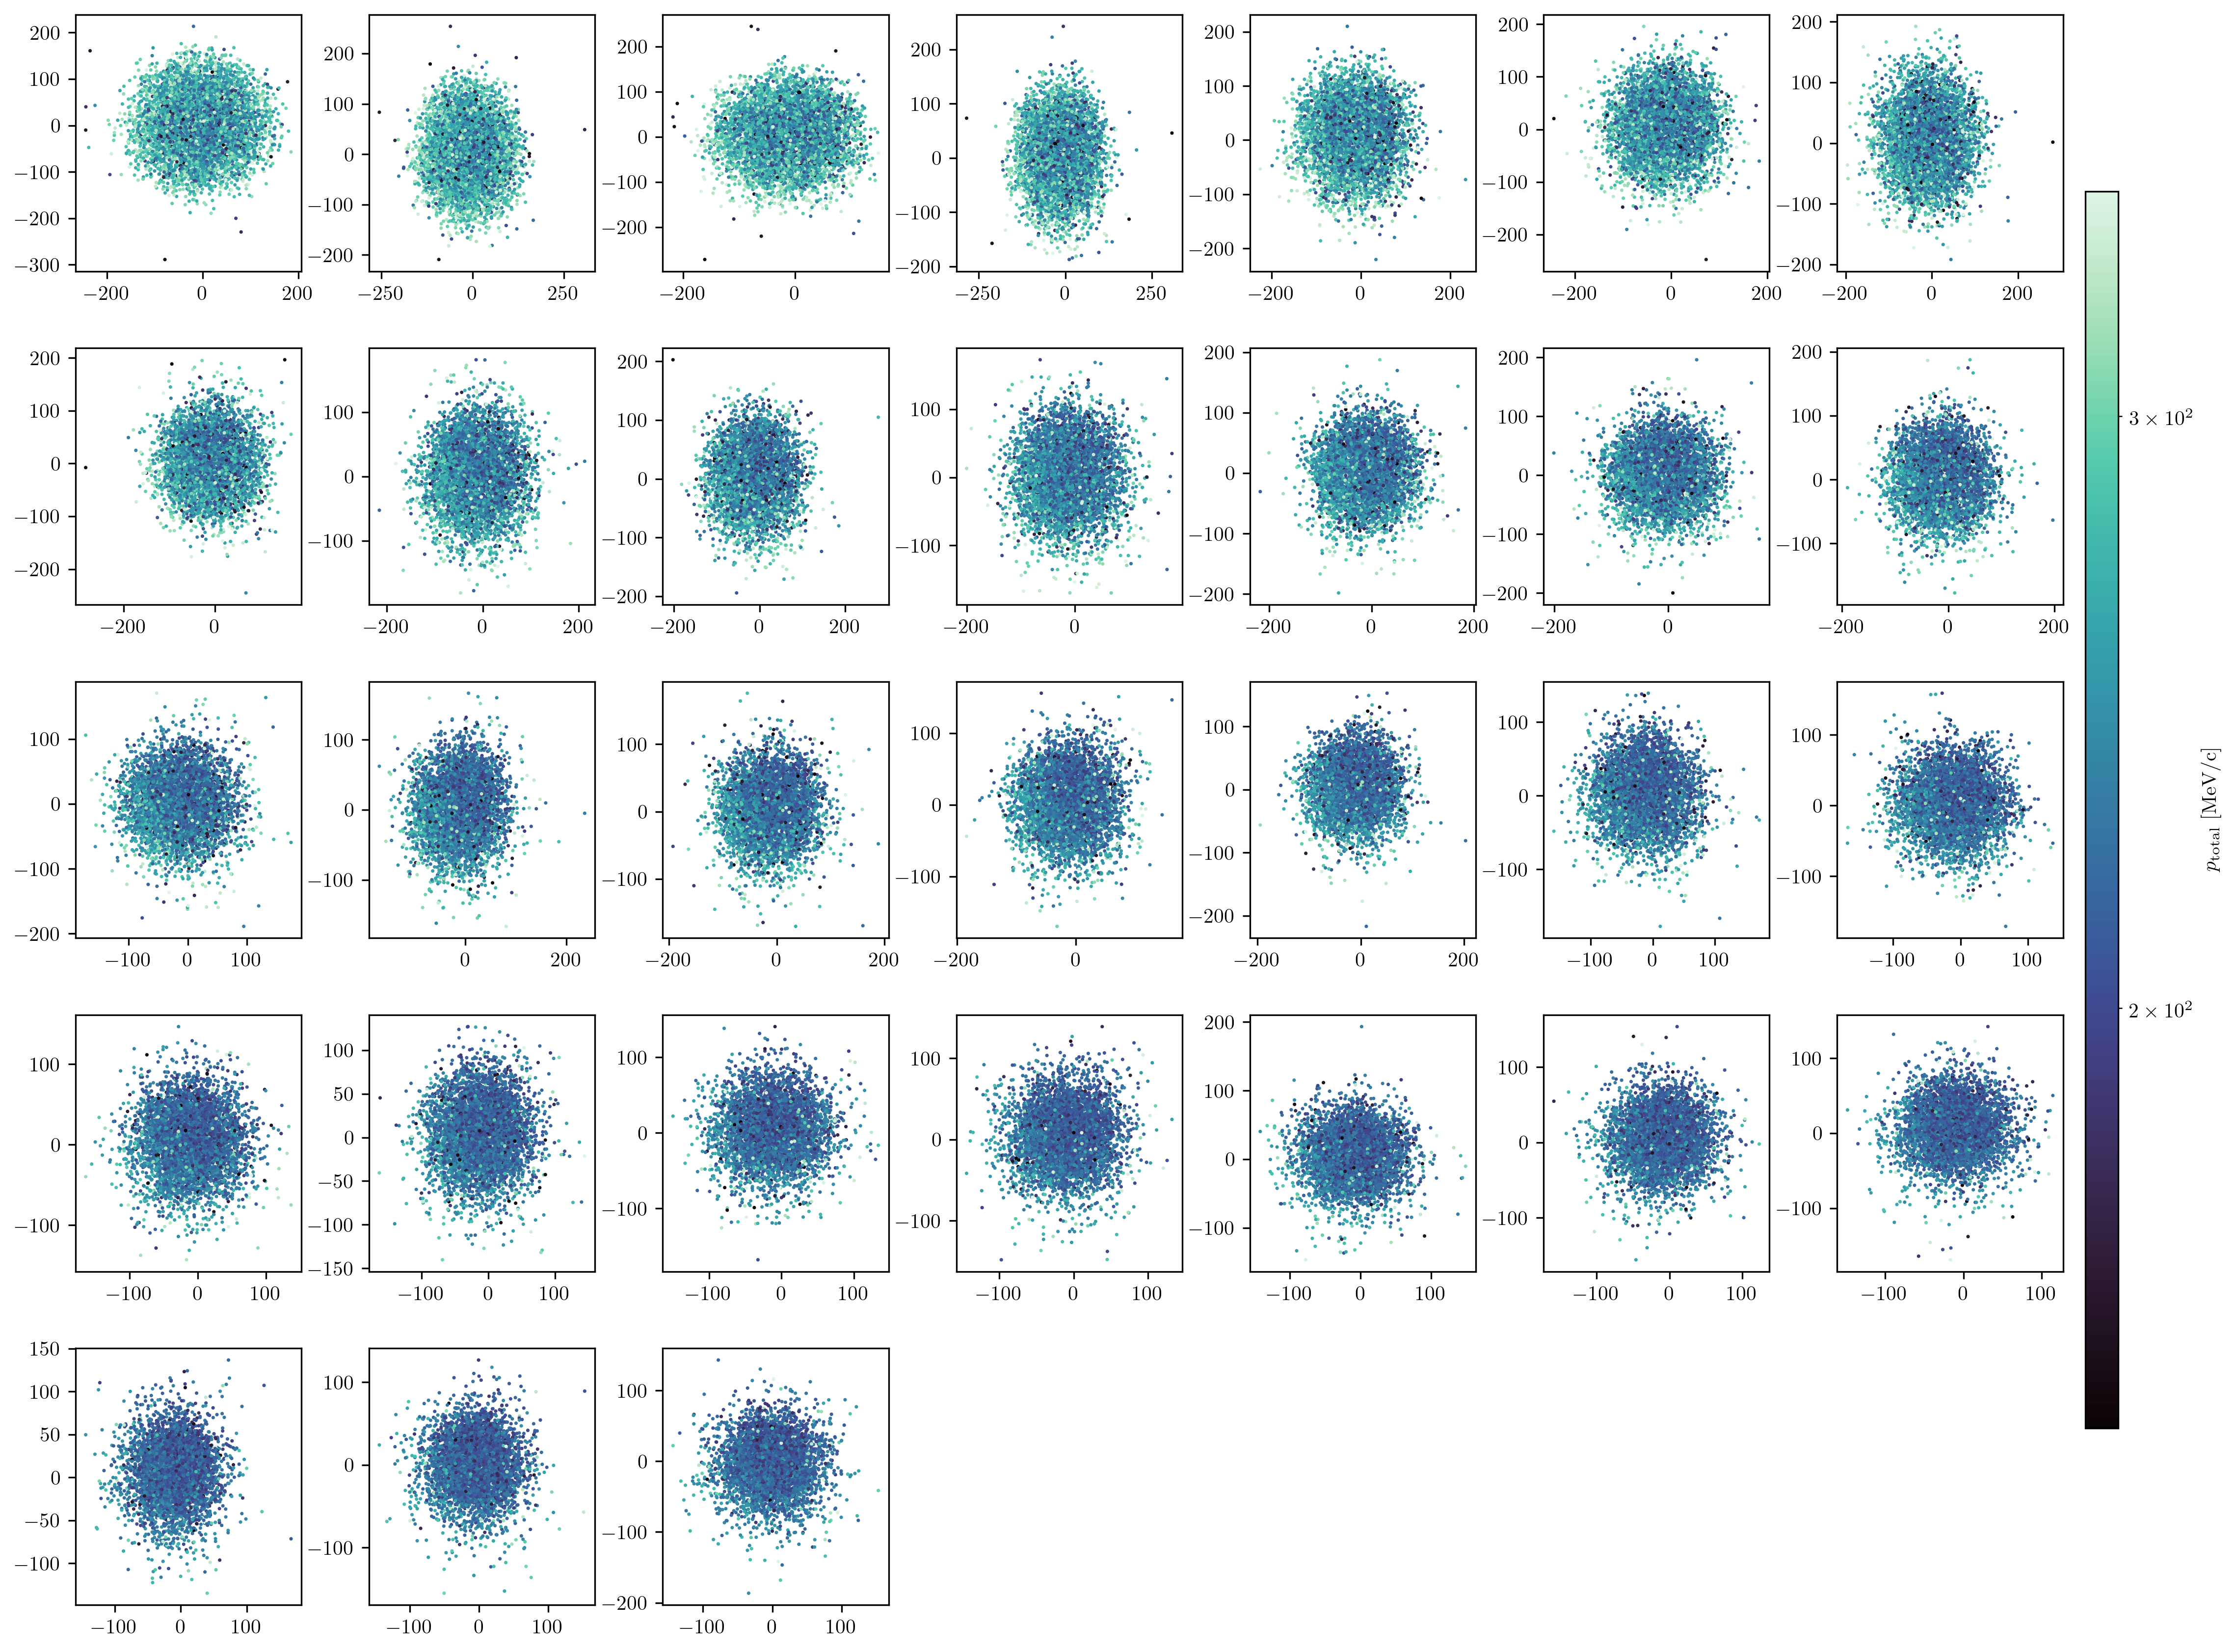

In [229]:
# Subplot of total momentum distributions:

vmin = min([np.min(p[p > 0]) for p in ptotal_vals])
vmax = max([np.max(p) for p in ptotal_vals])
norm = LogNorm(vmin=vmin, vmax=vmax)

cmap = sns.color_palette("mako", as_cmap=True)

fig, axes = plt.subplots(5, 7, figsize=(15, 12))
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)
axes = axes.flatten()

for i in range(31):
    mask = ptotal_vals[i] > 0
    axes[i].scatter(x_vals[i][mask], y_vals[i][mask], c=ptotal_vals[i][mask],
                    cmap=cmap, norm=norm, s=0.5)

for i in range(31, 35):
    axes[i].axis('off')

cbar_ax = fig.add_axes([0.96, 0.15, 0.015, 0.7])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, label=r'$p_{\text{total}}$ [MeV/c]')

plt.show()

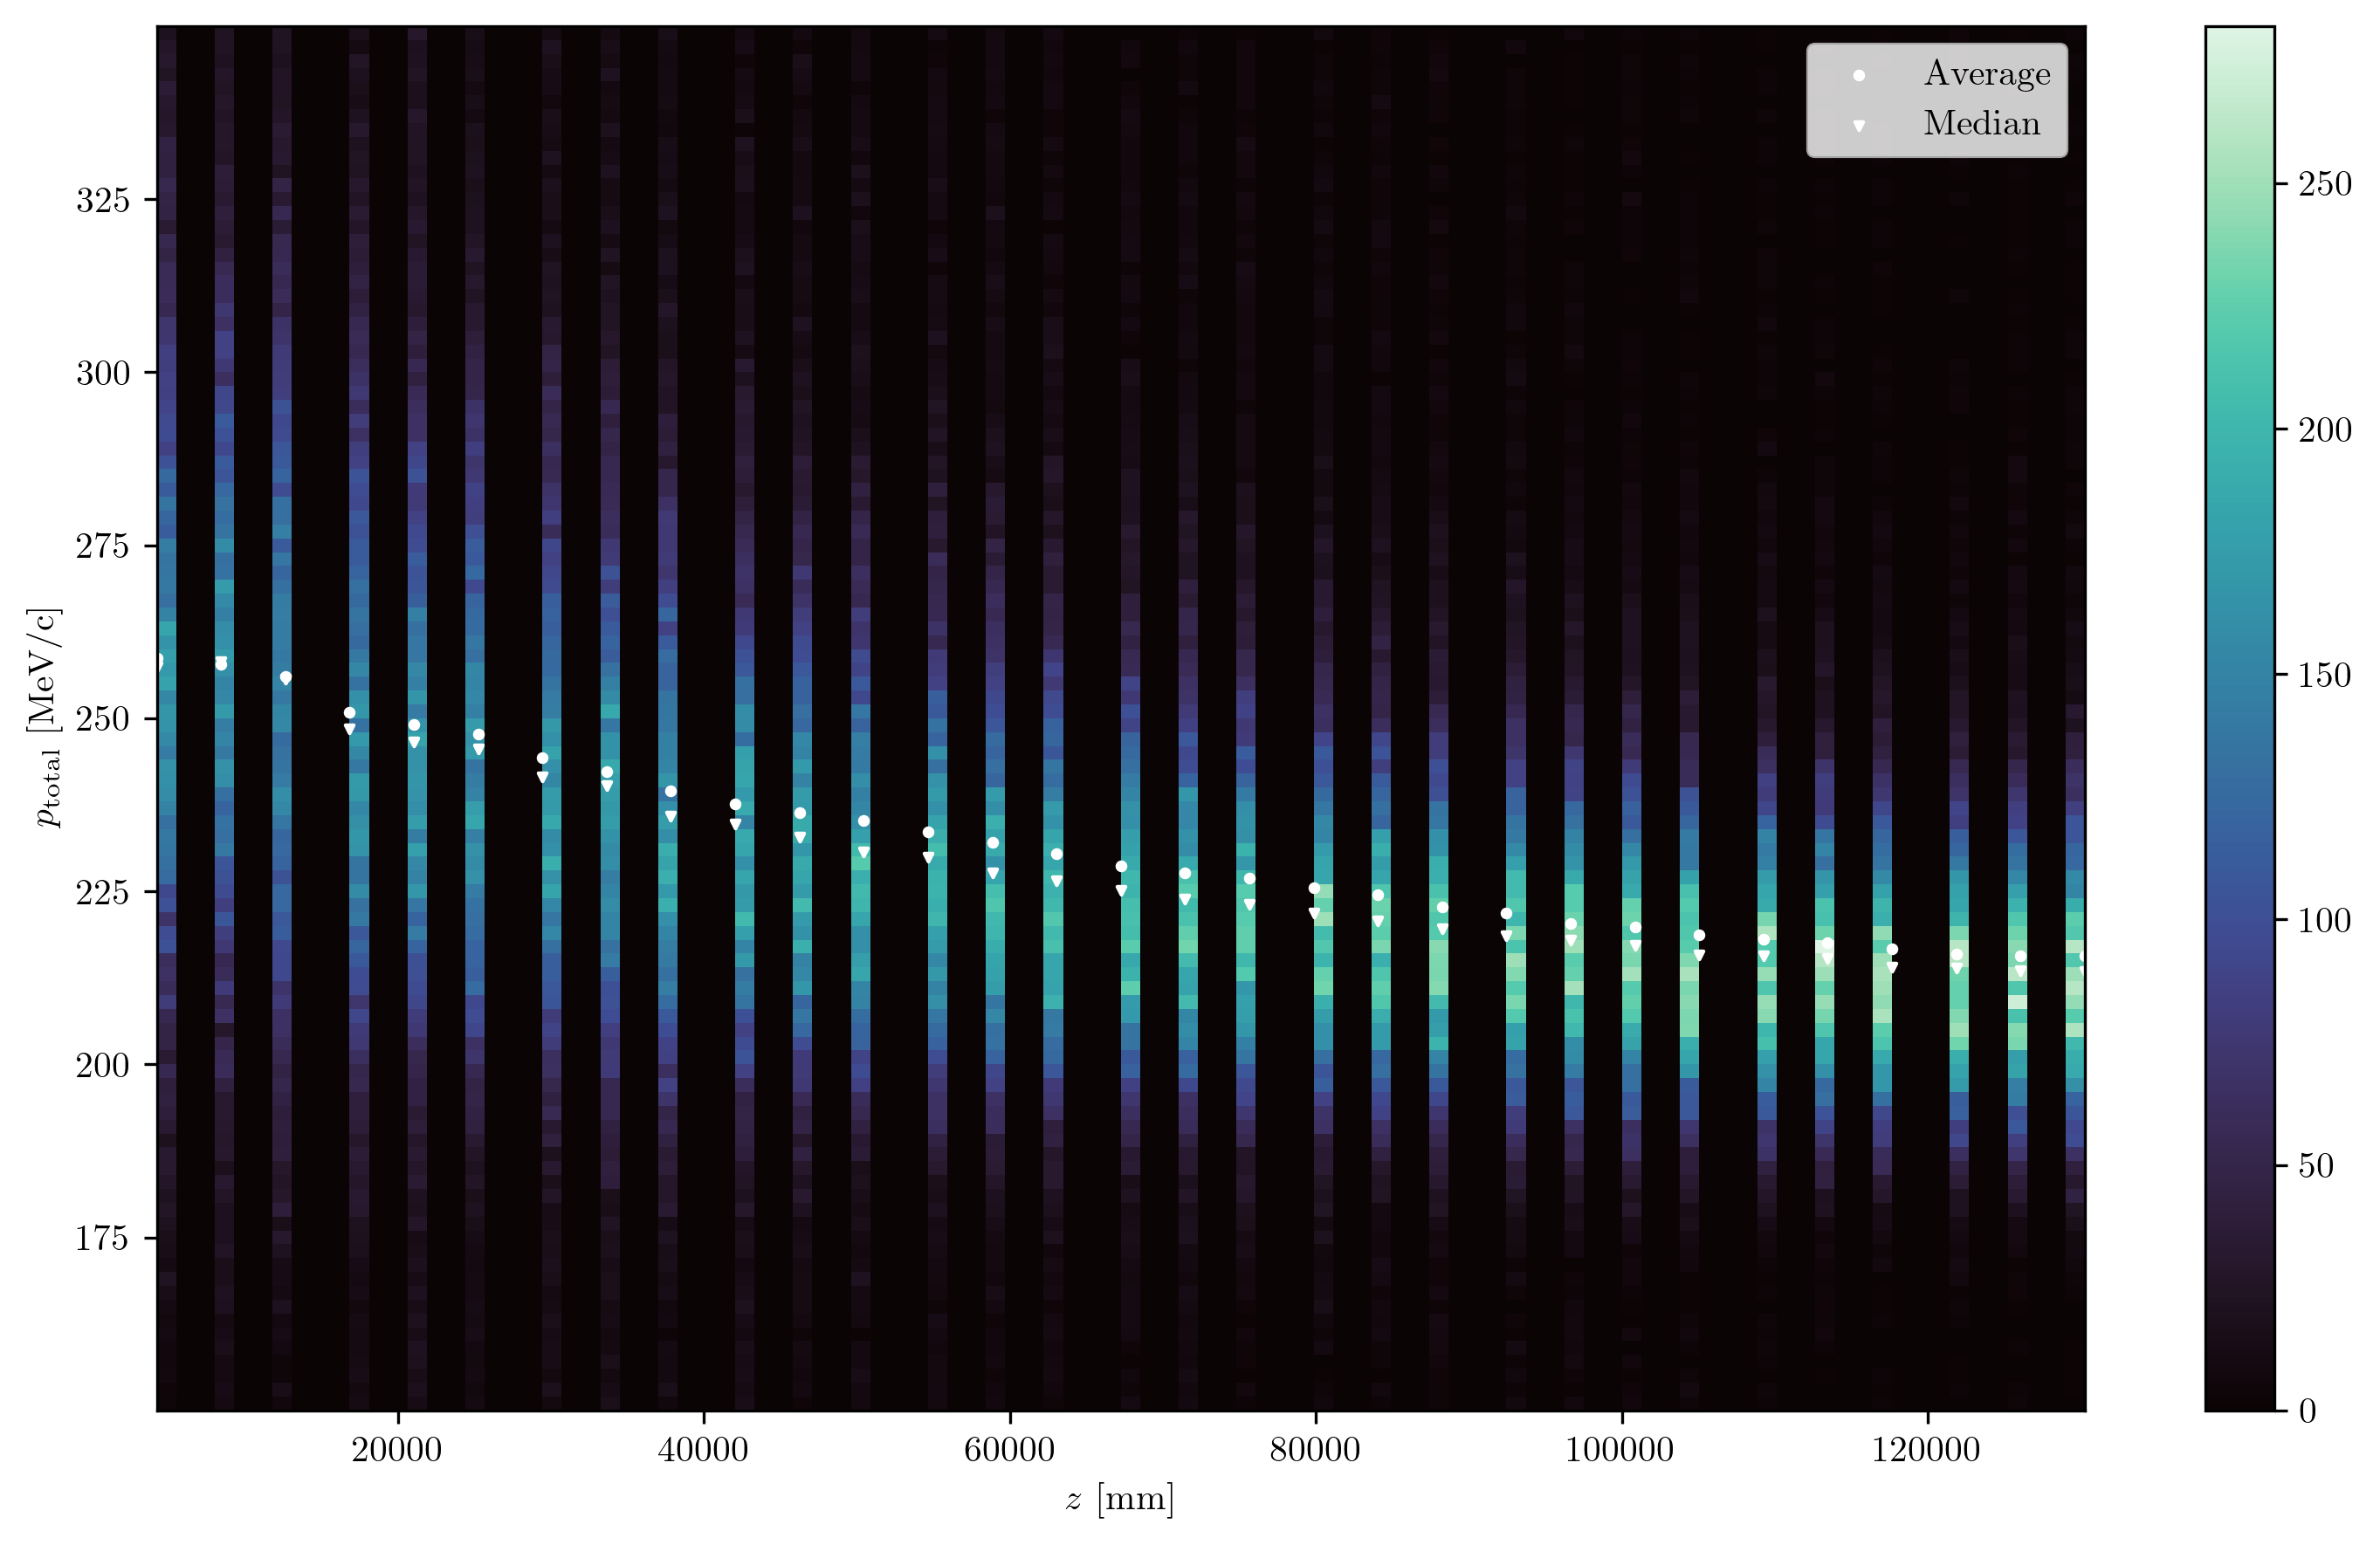

In [230]:
# Plot 2D histogram of total momentum distributions:

ptotal_array = np.zeros((len(ptotal_vals), len(ptotal_vals[0])))
ptotal_array[np.where(ptotal_array==0)] = np.nan
for i in range(len(ptotal_vals)):
    for j in range(len(ptotal_vals[i])):
        ptotal_array[i][j] = ptotal_vals[i][j]

z_list = []
for i in range(len(z_vals)):
    z_list.append(z_vals[i][0])

flattened_z = []
flattened_p = []

for z, p_list in zip(z_list, ptotal_vals):
    flattened_z.extend([z] * len(p_list))
    flattened_p.extend(p_list)

flattened_z = np.array(flattened_z)
flattened_p = np.array(flattened_p)

cut = flattened_p < 400
z_valid = flattened_z[cut]
p_valid = flattened_p[cut]

plt.figure(figsize=(10, 6))
cmap = sns.color_palette("mako", as_cmap=True)
hist = plt.hist2d(z_valid, p_valid, bins=[100, 100], cmap=cmap)

plt.colorbar(hist[3])
plt.xlabel('$z$ [mm]')
plt.ylabel(r'$p_{\text{total}}$ [MeV/c]')
plt.tight_layout()

plt.scatter(z_list, ptotal_avgs, color='white', s=5, label='Average')
plt.scatter(z_list, ptotal_med, color='white', s=5, label='Median', marker='v')
plt.legend()

plt.show()

### Comparison to Yuri's paper

In [231]:
# Load transmission rate data from paper:
data = np.genfromtxt('../paper-data/paper_transmission_rate.csv',delimiter=',')
data_x = []; data_y = []
for i in range(len(data)):
    data_x.append(data[i][0])
    data_y.append(data[i][1])

# Compare final transmission rate to sim:
transmission_rate_paper = data_y[len(data_y)-1]/data_y[0]
print('Final transmission rate (paper): '+str(transmission_rate_paper))
transmission_rate_sim = len(z_vals[ndet-1])/len(z_vals[0])
print('Final transmission rate (simulation): '+str(transmission_rate_sim))

Final transmission rate (paper): 0.67750449910018
Final transmission rate (simulation): 0.6703626402295851


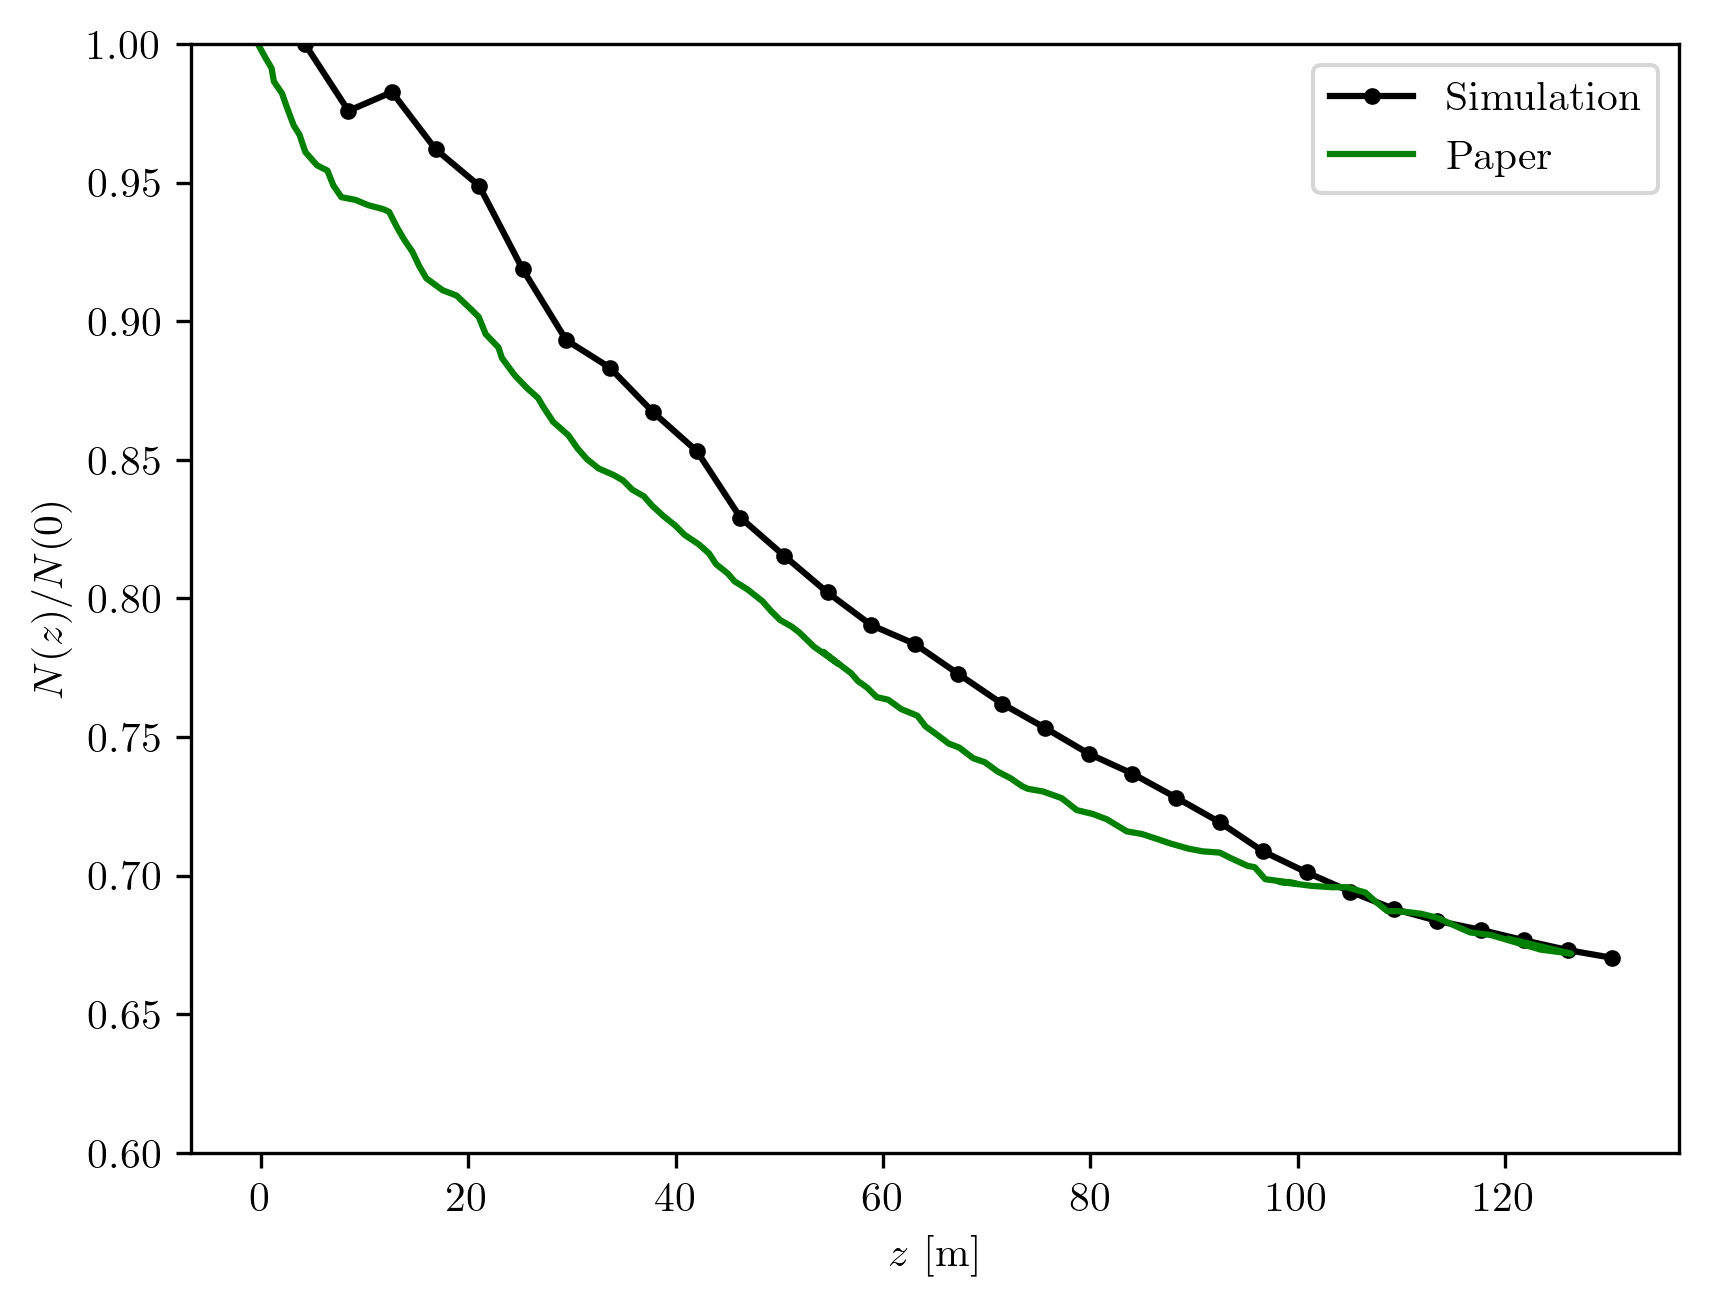

In [232]:
# Plot transmission rate vs. z for sim and paper:
plt.plot([i[0]/1000 for i in z_vals],[(len(i)/len(z_vals[0])) for i in z_vals],marker='.',color='black',label='Simulation') # z: mm --> m
plt.plot(data_x,data_y,color='green',label='Paper')
plt.legend()
plt.ylim((0.6,1))
plt.xlabel('$z$ [m]') # m to match units in paper
plt.ylabel('$N(z)/N(0)$')
plt.show()

## Animations

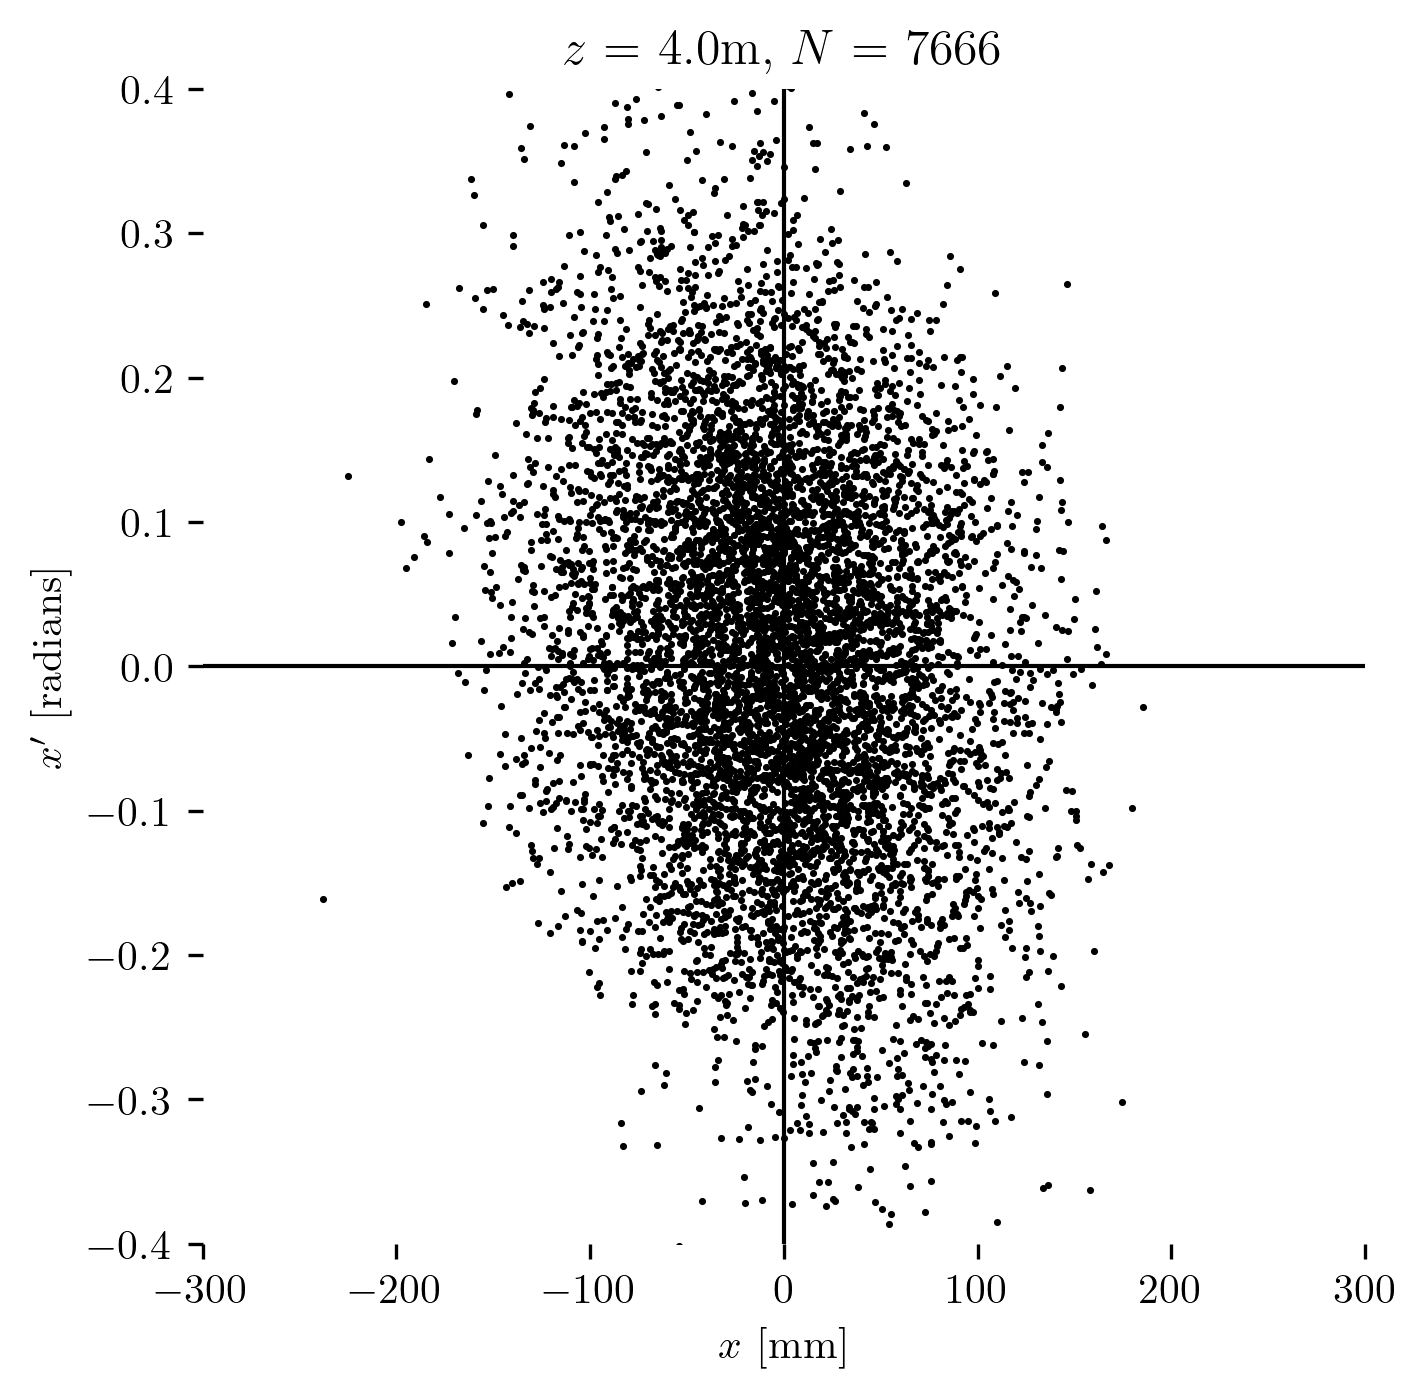

In [234]:
fig, ax = plt.subplots(figsize=(5, 5))
def animate(frame):

    plt.clf()

    # Plot x prime vs. x:
    for spine in ['top', 'right', 'bottom', 'left']:
        plt.gca().spines[spine].set_visible(False)
    plt.axhline(0, color='black', linewidth=1, zorder=-10)
    plt.axvline(0, color='black', linewidth=1, zorder=-10)
    plt.scatter(x_vals[frame],xp_vals[frame],color='black',s=0.5)
    plt.title(f'$z$ = {np.round(z_vals[frame][0]/1000)}m,  $N$ = {len(z_vals[frame])}')
    plt.xlim(-300,300)
    plt.ylim(-0.4,0.4)
    plt.xlabel('$x$ [mm]')
    plt.ylabel('$x^{\prime}$ [radians]')

animation = FuncAnimation(fig, animate, frames=len(x_vals), interval=250, repeat=True)
animation.save(fig_dir+'phase_space_evolution.gif', writer='pillow')